Aylin Aydın S018183
Before run the all code please, delete the lines "#io.imsave()" that save the images from the comment, because the dimensions of the saved images are being calculated.

In [409]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from skimage.transform import rescale, resize, downscale_local_mean

import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image
import cv2
import os
from webcolors

In [2]:
def image_read (name):
    #Read the image
    image = io.imread(name)
    io.imshow(image)
    io.show()
    return image

In [3]:
def resizing(image):
    #Dimension of the original image
    rows = image.shape[0]
    cols = image.shape[1]
    #Flatten the image
    image = image.reshape(rows*cols, 3)
    return image

In [4]:
def img_bytes (image):
    size=os.path.getsize(image)
    return size

In [5]:
def unique_color(image):
    uniques = np.unique(image.reshape(-1,image.shape[-1]), axis=0)
    return len(uniques)

In [268]:
def wcss(image,center):
    dist=np.sum((np.subtract(image,center))**2)
    return dist/len(image)

In [321]:
def bcss(image,center):
    mean_=np.mean(image,axis=0)
    dist=np.sum(np.subtract(mean_,center)**2)
    return dist*len(image)  

In [ ]:
def silhoutte(image,center):
    

In [281]:
cluster=[2,4,8,16,32,64,128,256]

In [455]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

def names_of_colors(kmeans):
    clustroids=kmeans.tolist()
    names=[]
    for i in range(len(clustroids)):
        name=convert_rgb_to_names(clustroids[i])
        print("Closest Match for the name of ", i,"th centroid color : ", name)
        names.append(name)
    return names


# Baboon

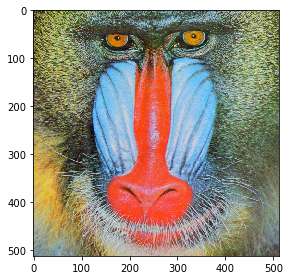

In [8]:
baboon_image=image_read('baboon.png')

In [ ]:
baboon_image=baboon_image.astype(int)

In [9]:
#baboon_image = resize(baboon_image, (256, 128))

In [10]:
rows_baboon = baboon_image.shape[0]
cols_baboon = baboon_image.shape[1]

In [11]:
baboon_image=resizing(baboon_image)

print("image bytes = ",img_bytes('baboon.png'))

print("image unique colors = ",unique_color(baboon_image))

image bytes =  651142
image unique colors =  230427


In [338]:
len(baboon_image)

262144

## k=2

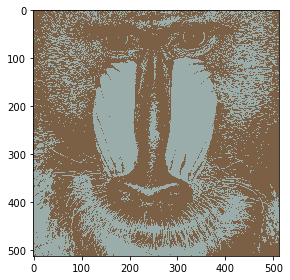

In [12]:
#Implement k-means clustering to form k clusters
kmeans_baboon_2= KMeans(n_clusters=2)
kmeans_baboon_2.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_2 = kmeans_baboon_2.cluster_centers_[kmeans_baboon_2.labels_]
compressed_image_baboon_2  = np.clip(compressed_image_baboon_2.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_2  = compressed_image_baboon_2.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_2.png", compressed_image_baboon_2 )
io.imshow(compressed_image_baboon_2 )
io.show()

In [13]:
baboon_2_bytes=img_bytes('compressed_image_baboon_2.png')
print(baboon_2_bytes)

33954


In [269]:
baboon_2_wcss=wcss(baboon_image,kmeans_baboon_2.cluster_centers_[kmeans_baboon_2.labels_])

In [323]:
baboon_2_bcss=bcss(baboon_image,kmeans_baboon_2.cluster_centers_[kmeans_baboon_2.labels_])

In [496]:
from sklearn import metrics
baboon_2_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_2.labels_, metric='euclidean')

In [324]:
baboon_2_bcss

285958980642791.8

In [308]:
baboon_2_wcss

5010.375410450375

In [456]:
names_of_colors(kmeans_baboon_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  dimgray
Closest Match for the name of  1 th centroid color :  darkgray


['dimgray', 'darkgray']

## k=4

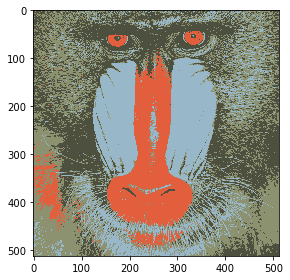

In [16]:
#Implement k-means clustering to form k clusters
kmeans_baboon_4= KMeans(n_clusters=4)
kmeans_baboon_4.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_4 = kmeans_baboon_4.cluster_centers_[kmeans_baboon_4.labels_]
compressed_image_baboon_4  = np.clip(compressed_image_baboon_4.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_4  = compressed_image_baboon_4.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_4.png", compressed_image_baboon_4 )
io.imshow(compressed_image_baboon_4)
io.show()

In [17]:
baboon_4_bytes=img_bytes("compressed_image_baboon_4.png")
print("bytes= ",baboon_4_bytes)

bytes=  55943


In [266]:
baboon_4_wcss=wcss(baboon_image,kmeans_baboon_4.cluster_centers_[kmeans_baboon_4.labels_])

In [325]:
baboon_4_bcss=bcss(baboon_image,kmeans_baboon_4.cluster_centers_[kmeans_baboon_4.labels_])

In [497]:
baboon_4_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_4.labels_, metric='euclidean')

In [326]:
baboon_4_bcss

482914708109658.6

In [399]:
kmeans_baboon_4.cluster_centers_

array([[140.84194605, 145.71900728, 112.86092723],
       [152.65375826, 184.57736494, 202.53696075],
       [ 77.74474592,  80.04663934,  63.59430021],
       [227.65635224,  94.66177754,  60.64280262]])

In [439]:
names_of_colors(kmeans_baboon_4.cluster_centers_)

Closest Match for the name of  0 th centroid color :  gray
Closest Match for the name of  1 th centroid color :  lightsteelblue
Closest Match for the name of  2 th centroid color :  darkolivegreen
Closest Match for the name of  3 th centroid color :  tomato


## k=8

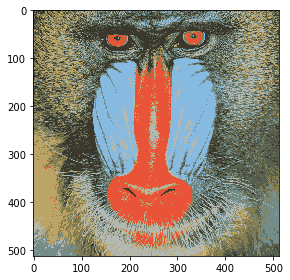

In [19]:
#Implement k-means clustering to form k clusters
kmeans_baboon_8= KMeans(n_clusters=8)
kmeans_baboon_8.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_8 = kmeans_baboon_8.cluster_centers_[kmeans_baboon_8.labels_]
compressed_image_baboon_8  = np.clip(compressed_image_baboon_8.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_8  = compressed_image_baboon_8.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_8.png", compressed_image_baboon_8 )
io.imshow(compressed_image_baboon_8)
io.show()

In [20]:
baboon_8_bytes=img_bytes("compressed_image_baboon_8.png")
print("bytes= ",baboon_8_bytes)

bytes=  100143


In [21]:
baboon_8_wcss=wcss(baboon_image,kmeans_baboon_8.cluster_centers_[kmeans_baboon_8.labels_])

In [327]:
baboon_8_bcss=bcss(baboon_image,kmeans_baboon_8.cluster_centers_[kmeans_baboon_8.labels_])

In [498]:
baboon_8_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_8.labels_, metric='euclidean')

In [440]:
names_of_colors(kmeans_baboon_8.cluster_centers_)

Closest Match for the name of  0 th centroid color :  dimgray
Closest Match for the name of  1 th centroid color :  darkgray
Closest Match for the name of  2 th centroid color :  darkkhaki
Closest Match for the name of  3 th centroid color :  skyblue
Closest Match for the name of  4 th centroid color :  dimgray
Closest Match for the name of  5 th centroid color :  tomato
Closest Match for the name of  6 th centroid color :  darkslategray
Closest Match for the name of  7 th centroid color :  lightslategray


## k=16

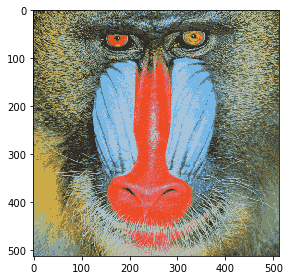

In [22]:
#Implement k-means clustering to form k clusters
kmeans_baboon_16= KMeans(n_clusters=16)
kmeans_baboon_16.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_16 = kmeans_baboon_16.cluster_centers_[kmeans_baboon_16.labels_]
compressed_image_baboon_16  = np.clip(compressed_image_baboon_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_16  = compressed_image_baboon_16.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_16.png", compressed_image_baboon_16 )
io.imshow(compressed_image_baboon_16)
io.show()

In [23]:
baboon_16_bytes=img_bytes("compressed_image_baboon_16.png")
print("bytes= ",baboon_16_bytes)

bytes=  155374


In [24]:
baboon_16_wcss=wcss(baboon_image,kmeans_baboon_16.cluster_centers_[kmeans_baboon_16.labels_])

In [328]:
baboon_16_bcss=bcss(baboon_image,kmeans_baboon_16.cluster_centers_[kmeans_baboon_16.labels_])

In [500]:
baboon_16_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_16.labels_, metric='euclidean')

In [457]:
names_of_colors(kmeans_baboon_16.cluster_centers_)

Closest Match for the name of  0 th centroid color :  peru
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  skyblue
Closest Match for the name of  3 th centroid color :  darkseagreen
Closest Match for the name of  4 th centroid color :  palevioletred
Closest Match for the name of  5 th centroid color :  chocolate
Closest Match for the name of  6 th centroid color :  cadetblue
Closest Match for the name of  7 th centroid color :  lightsteelblue
Closest Match for the name of  8 th centroid color :  darkslategray
Closest Match for the name of  9 th centroid color :  darkkhaki
Closest Match for the name of  10 th centroid color :  dimgray
Closest Match for the name of  11 th centroid color :  darkolivegreen
Closest Match for the name of  12 th centroid color :  indianred
Closest Match for the name of  13 th centroid color :  silver
Closest Match for the name of  14 th centroid color :  peru
Closest Match for the name 

['peru',
 'darkslategray',
 'skyblue',
 'darkseagreen',
 'palevioletred',
 'chocolate',
 'cadetblue',
 'lightsteelblue',
 'darkslategray',
 'darkkhaki',
 'dimgray',
 'darkolivegreen',
 'indianred',
 'silver',
 'peru',
 'gray']

## k=32

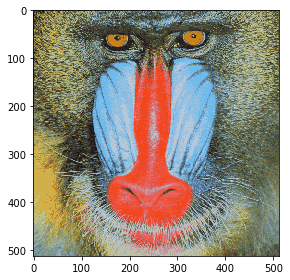

In [275]:
#Implement k-means clustering to form k clusters
kmeans_baboon_32= KMeans(n_clusters=32)
kmeans_baboon_32.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_32 = kmeans_baboon_32.cluster_centers_[kmeans_baboon_32.labels_]
compressed_image_baboon_32  = np.clip(compressed_image_baboon_32.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_32 = compressed_image_baboon_32.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_32.png", compressed_image_baboon_32)
io.imshow(compressed_image_baboon_32)
io.show()

In [276]:
baboon_32_bytes=img_bytes("compressed_image_baboon_32.png")
print("bytes= ",baboon_32_bytes)

bytes=  155249


In [277]:
baboon_32_wcss=wcss(baboon_image,kmeans_baboon_32.cluster_centers_[kmeans_baboon_32.labels_])

In [329]:
baboon_32_bcss=bcss(baboon_image,kmeans_baboon_32.cluster_centers_[kmeans_baboon_32.labels_])

In [501]:
baboon_32_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_32.labels_, metric='euclidean')

In [458]:
names_of_colors(kmeans_baboon_32.cluster_centers_)

Closest Match for the name of  0 th centroid color :  orangered
Closest Match for the name of  1 th centroid color :  dimgray
Closest Match for the name of  2 th centroid color :  lightsteelblue
Closest Match for the name of  3 th centroid color :  darkslategray
Closest Match for the name of  4 th centroid color :  darkkhaki
Closest Match for the name of  5 th centroid color :  darkseagreen
Closest Match for the name of  6 th centroid color :  gray
Closest Match for the name of  7 th centroid color :  olivedrab
Closest Match for the name of  8 th centroid color :  indianred
Closest Match for the name of  9 th centroid color :  slategray
Closest Match for the name of  10 th centroid color :  darkolivegreen
Closest Match for the name of  11 th centroid color :  skyblue
Closest Match for the name of  12 th centroid color :  silver
Closest Match for the name of  13 th centroid color :  tomato
Closest Match for the name of  14 th centroid color :  rosybrown
Closest Match for the name of  15

['orangered',
 'dimgray',
 'lightsteelblue',
 'darkslategray',
 'darkkhaki',
 'darkseagreen',
 'gray',
 'olivedrab',
 'indianred',
 'slategray',
 'darkolivegreen',
 'skyblue',
 'silver',
 'tomato',
 'rosybrown',
 'darkkhaki',
 'darkolivegreen',
 'gray',
 'darkgoldenrod',
 'peru',
 'palevioletred',
 'black',
 'cornflowerblue',
 'darkgray',
 'darkslategray',
 'skyblue',
 'sienna',
 'lightslategray',
 'gray',
 'dimgray',
 'darkkhaki',
 'darkolivegreen']

## k=64

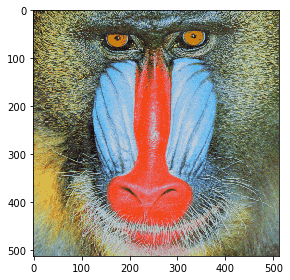

In [28]:
#Implement k-means clustering to form k clusters
kmeans_baboon_64= KMeans(n_clusters=64)
kmeans_baboon_64.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_64= kmeans_baboon_64.cluster_centers_[kmeans_baboon_64.labels_]
compressed_image_baboon_64  = np.clip(compressed_image_baboon_64.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_64  = compressed_image_baboon_64.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_64.png", compressed_image_baboon_64 )
io.imshow(compressed_image_baboon_64)
io.show()

In [29]:
baboon_64_bytes=img_bytes("compressed_image_baboon_64.png")
print("bytes= ",baboon_64_bytes)

bytes=  370187


In [30]:
baboon_64_wcss=wcss(baboon_image,kmeans_baboon_64.cluster_centers_[kmeans_baboon_64.labels_])

In [330]:
baboon_64_bcss=bcss(baboon_image,kmeans_baboon_64.cluster_centers_[kmeans_baboon_64.labels_])

In [502]:
baboon_64_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_64.labels_, metric='euclidean')

In [459]:
names_of_colors(kmeans_baboon_64.cluster_centers_)

Closest Match for the name of  0 th centroid color :  skyblue
Closest Match for the name of  1 th centroid color :  olivedrab
Closest Match for the name of  2 th centroid color :  tomato
Closest Match for the name of  3 th centroid color :  darkseagreen
Closest Match for the name of  4 th centroid color :  darkslategray
Closest Match for the name of  5 th centroid color :  darkgray
Closest Match for the name of  6 th centroid color :  slategray
Closest Match for the name of  7 th centroid color :  darkkhaki
Closest Match for the name of  8 th centroid color :  black
Closest Match for the name of  9 th centroid color :  cornflowerblue
Closest Match for the name of  10 th centroid color :  lightcoral
Closest Match for the name of  11 th centroid color :  silver
Closest Match for the name of  12 th centroid color :  sandybrown
Closest Match for the name of  13 th centroid color :  darkkhaki
Closest Match for the name of  14 th centroid color :  dimgray
Closest Match for the name of  15 th

['skyblue',
 'olivedrab',
 'tomato',
 'darkseagreen',
 'darkslategray',
 'darkgray',
 'slategray',
 'darkkhaki',
 'black',
 'cornflowerblue',
 'lightcoral',
 'silver',
 'sandybrown',
 'darkkhaki',
 'dimgray',
 'darkslategray',
 'steelblue',
 'sienna',
 'darkgray',
 'orangered',
 'darkgoldenrod',
 'darkslategray',
 'palevioletred',
 'lightslategray',
 'dimgray',
 'cornflowerblue',
 'gray',
 'gray',
 'lightsteelblue',
 'dimgray',
 'indianred',
 'peru',
 'darkolivegreen',
 'darkolivegreen',
 'rosybrown',
 'darkgray',
 'gray',
 'darkolivegreen',
 'darkslategray',
 'peru',
 'darkgray',
 'darkolivegreen',
 'silver',
 'darkkhaki',
 'indianred',
 'darkkhaki',
 'slategray',
 'lightslategray',
 'darkslategray',
 'dimgray',
 'skyblue',
 'dimgray',
 'chocolate',
 'dimgray',
 'skyblue',
 'tomato',
 'rosybrown',
 'lightsteelblue',
 'darkslategray',
 'sienna',
 'gray',
 'cadetblue',
 'darkolivegreen',
 'darkslategray']

## k=128

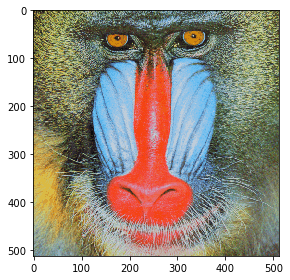

In [31]:
#Implement k-means clustering to form k clusters
kmeans_baboon_128= KMeans(n_clusters=128)
kmeans_baboon_128.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_128 = kmeans_baboon_128.cluster_centers_[kmeans_baboon_128.labels_]
compressed_image_baboon_128 = np.clip(compressed_image_baboon_128.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_128  = compressed_image_baboon_128.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_128.png", compressed_image_baboon_128 )
io.imshow(compressed_image_baboon_128)
io.show()

In [32]:
baboon_128_bytes=img_bytes("compressed_image_baboon_128.png")
print("bytes= ",baboon_128_bytes)

bytes=  471676


In [33]:
baboon_128_wcss=wcss(baboon_image,kmeans_baboon_128.cluster_centers_[kmeans_baboon_128.labels_])

In [331]:
baboon_128_bcss=bcss(baboon_image,kmeans_baboon_128.cluster_centers_[kmeans_baboon_128.labels_])

In [503]:
baboon_128_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_128.labels_, metric='euclidean')

In [446]:
names_of_colors(kmeans_baboon_128.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkolivegreen
Closest Match for the name of  1 th centroid color :  silver
Closest Match for the name of  2 th centroid color :  orangered
Closest Match for the name of  3 th centroid color :  gray
Closest Match for the name of  4 th centroid color :  darkslategray
Closest Match for the name of  5 th centroid color :  skyblue
Closest Match for the name of  6 th centroid color :  darkkhaki
Closest Match for the name of  7 th centroid color :  darkseagreen
Closest Match for the name of  8 th centroid color :  palevioletred
Closest Match for the name of  9 th centroid color :  slategray
Closest Match for the name of  10 th centroid color :  indianred
Closest Match for the name of  11 th centroid color :  tomato
Closest Match for the name of  12 th centroid color :  darkgray
Closest Match for the name of  13 th centroid color :  darkslategray
Closest Match for the name of  14 th centroid color :  sienna
Closest Match for the name of  1

['darkolivegreen',
 'silver',
 'orangered',
 'gray',
 'darkslategray',
 'skyblue',
 'darkkhaki',
 'darkseagreen',
 'palevioletred',
 'slategray',
 'indianred',
 'tomato',
 'darkgray',
 'darkslategray',
 'sienna',
 'darkslategray',
 'darkkhaki',
 'sienna',
 'cornflowerblue',
 'slategray',
 'slategray',
 'darkgray',
 'skyblue',
 'darkolivegreen',
 'lightslategray',
 'darkkhaki',
 'dimgray',
 'goldenrod',
 'steelblue',
 'indianred',
 'gray',
 'dimgray',
 'darkslategray',
 'darkkhaki',
 'lightsteelblue',
 'darkolivegreen',
 'tomato',
 'dimgray',
 'sienna',
 'silver',
 'darkgoldenrod',
 'gray',
 'darkolivegreen',
 'skyblue',
 'dimgray',
 'gray',
 'palevioletred',
 'cornflowerblue',
 'gray',
 'darkslategray',
 'darkolivegreen',
 'black',
 'darkslategray',
 'dimgray',
 'lightcoral',
 'lightslategray',
 'dimgray',
 'darkseagreen',
 'lightsteelblue',
 'darkolivegreen',
 'darkkhaki',
 'chocolate',
 'goldenrod',
 'orangered',
 'darkslategray',
 'darkolivegreen',
 'darkolivegreen',
 'steelblue',
 

## k=256

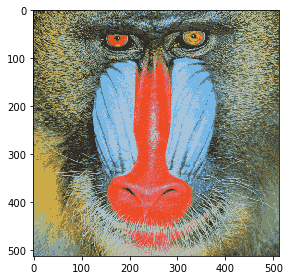

In [34]:
#Implement k-means clustering to form k clusters
kmeans_baboon_256= KMeans(n_clusters=256)
kmeans_baboon_256.fit(baboon_image)

#Replace each pixel value with its nearby centroid
compressed_image_baboon_256 = kmeans_baboon_256.cluster_centers_[kmeans_baboon_256.labels_]
compressed_image_baboon_256  = np.clip(compressed_image_baboon_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_baboon_256  = compressed_image_baboon_256.reshape(rows_baboon,cols_baboon,3)
#Save and display output image
#io.imsave("compressed_image_baboon_256.png", compressed_image_baboon_256 )
io.imshow(compressed_image_baboon_256)
io.show()

In [35]:
baboon_256_bytes=img_bytes("compressed_image_baboon_256.png")
print("bytes= ",baboon_256_bytes)

bytes=  155374


In [36]:
baboon_256_wcss=wcss(baboon_image,kmeans_baboon_256.cluster_centers_[kmeans_baboon_256.labels_])

In [332]:
baboon_256_bcss=bcss(baboon_image,kmeans_baboon_256.cluster_centers_[kmeans_baboon_256.labels_])

In [504]:
baboon_256_silhouette=metrics.silhouette_score(baboon_image, kmeans_baboon_256.labels_, metric='euclidean')

In [460]:
names_of_colors(kmeans_baboon_256.cluster_centers_)

Closest Match for the name of  0 th centroid color :  gray
Closest Match for the name of  1 th centroid color :  darkgray
Closest Match for the name of  2 th centroid color :  darkslategray
Closest Match for the name of  3 th centroid color :  tomato
Closest Match for the name of  4 th centroid color :  skyblue
Closest Match for the name of  5 th centroid color :  dimgray
Closest Match for the name of  6 th centroid color :  yellowgreen
Closest Match for the name of  7 th centroid color :  steelblue
Closest Match for the name of  8 th centroid color :  tomato
Closest Match for the name of  9 th centroid color :  gray
Closest Match for the name of  10 th centroid color :  darkslategray
Closest Match for the name of  11 th centroid color :  darkkhaki
Closest Match for the name of  12 th centroid color :  silver
Closest Match for the name of  13 th centroid color :  lightslategray
Closest Match for the name of  14 th centroid color :  gray
Closest Match for the name of  15 th centroid col

Closest Match for the name of  150 th centroid color :  dimgray
Closest Match for the name of  151 th centroid color :  dimgray
Closest Match for the name of  152 th centroid color :  tomato
Closest Match for the name of  153 th centroid color :  darkseagreen
Closest Match for the name of  154 th centroid color :  sienna
Closest Match for the name of  155 th centroid color :  tomato
Closest Match for the name of  156 th centroid color :  darkslategray
Closest Match for the name of  157 th centroid color :  lightgray
Closest Match for the name of  158 th centroid color :  cadetblue
Closest Match for the name of  159 th centroid color :  gray
Closest Match for the name of  160 th centroid color :  darkolivegreen
Closest Match for the name of  161 th centroid color :  slategray
Closest Match for the name of  162 th centroid color :  gray
Closest Match for the name of  163 th centroid color :  darkolivegreen
Closest Match for the name of  164 th centroid color :  darkslategray
Closest Matc

['gray',
 'darkgray',
 'darkslategray',
 'tomato',
 'skyblue',
 'dimgray',
 'yellowgreen',
 'steelblue',
 'tomato',
 'gray',
 'darkslategray',
 'darkkhaki',
 'silver',
 'lightslategray',
 'gray',
 'darkslategray',
 'cornflowerblue',
 'palevioletred',
 'darkkhaki',
 'saddlebrown',
 'goldenrod',
 'orangered',
 'darkolivegreen',
 'darkslategray',
 'steelblue',
 'rosybrown',
 'dimgray',
 'lightsteelblue',
 'cornflowerblue',
 'darkgray',
 'darkgoldenrod',
 'black',
 'darkkhaki',
 'lightslategray',
 'darkslategray',
 'darkslategray',
 'olive',
 'indianred',
 'tan',
 'tomato',
 'dimgray',
 'darkkhaki',
 'silver',
 'dimgray',
 'darkkhaki',
 'darkolivegreen',
 'gray',
 'orangered',
 'gray',
 'rosybrown',
 'slategray',
 'lightslategray',
 'darkslategray',
 'darkgray',
 'darkslategray',
 'lightsteelblue',
 'dimgray',
 'silver',
 'darkgray',
 'skyblue',
 'darkolivegreen',
 'cornflowerblue',
 'indianred',
 'silver',
 'dimgray',
 'chocolate',
 'tan',
 'dimgray',
 'peru',
 'goldenrod',
 'lightslategr

In [278]:
baboon_wcss=[baboon_2_wcss,baboon_4_wcss,baboon_8_wcss,baboon_16_wcss,baboon_32_wcss,baboon_64_wcss,baboon_128_wcss,baboon_256_wcss]

In [333]:
baboon_bcss=[baboon_2_bcss,baboon_4_bcss,baboon_8_bcss,baboon_16_bcss,baboon_32_bcss,baboon_64_bcss,baboon_128_bcss,baboon_256_bcss]

In [513]:
baboon_silhouette=[baboon_2_silhouette,baboon_4_silhouette,baboon_8_silhouette,baboon_16_silhouette,baboon_32_silhouette,baboon_64_silhouette,baboon_128_silhouette,baboon_256_silhouette]

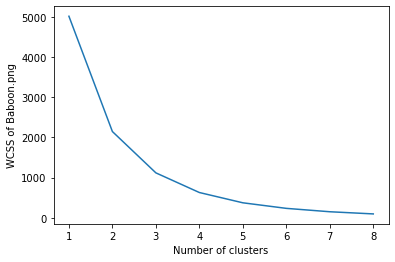

In [319]:
plt.plot(range(1,9), baboon_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS of Baboon.png') 
plt.show()

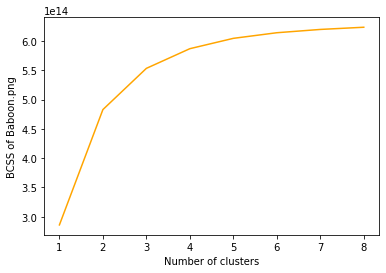

In [337]:
plt.plot(range(1,9), baboon_bcss, c="orange")
plt.xlabel('Number of clusters')
plt.ylabel('BCSS of Baboon.png') 
plt.show()

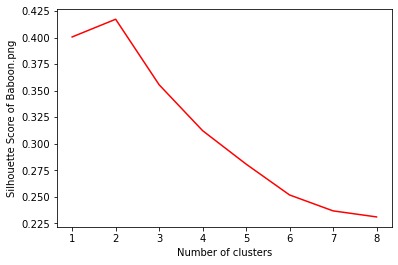

In [515]:
plt.plot(range(1,9), baboon_silhouette, c="red")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score of Baboon.png') 
plt.show()

# Flowers

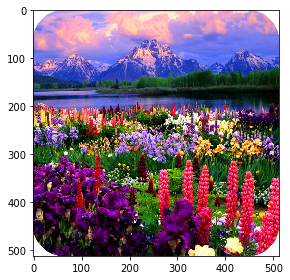

In [44]:
flowers_image=image_read('flowers.png')

In [45]:
flowers_image=flowers_image.astype(int)

In [46]:
flowers_image[0].shape

(512, 4)

In [47]:
flowers_image[0][0].shape

(4,)

In [48]:
copy_of=flowers_image.copy()
flowers=np.empty([512, 512,3])
for i in range(512):
    for j in range(512):
        flowers[i][j]= np.delete(copy_of[i][j],3)
        

In [49]:
flowers.shape

(512, 512, 3)

In [50]:
flowers_image=flowers

In [51]:
flowers_image=resize(flowers_image, (256,256),anti_aliasing=True)

In [52]:
#Dimension of the original image
flowers_rows = flowers_image.shape[0]
flowers_cols = flowers_image.shape[1]

flowers_image.shape

(256, 256, 3)

In [53]:
flowers_image= flowers_image.reshape(flowers_image.shape[0]*flowers_image.shape[1], 3)

print("image bytes = ",img_bytes('flowers.png'))

print("image unique colors = ",unique_color(flowers_image))

image bytes =  614122
image unique colors =  65519


## k=2

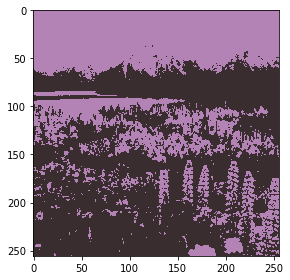

In [54]:
#Implement k-means clustering to form k clusters
kmeans_flowers_2= KMeans(n_clusters=2)
kmeans_flowers_2.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_2 = kmeans_flowers_2.cluster_centers_[kmeans_flowers_2.labels_]
compressed_image_flowers_2  = np.clip(compressed_image_flowers_2 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_2  = compressed_image_flowers_2 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_2.png", compressed_image_flowers_2 )
io.imshow(compressed_image_flowers_2 )
io.show()
    

In [55]:
print("image bytes = ",img_bytes('compressed_image_flowers_2.png'))

image bytes =  7166


In [56]:
flowers_2_wcss=wcss(flowers_image,kmeans_flowers_2.cluster_centers_[kmeans_flowers_2.labels_])

In [341]:
flowers_2_bcss=bcss(flowers_image,kmeans_flowers_2.cluster_centers_[kmeans_flowers_2.labels_])

In [505]:
flowers_2_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_2.labels_, metric='euclidean')

In [461]:
names_of_colors(kmeans_flowers_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkgray
Closest Match for the name of  1 th centroid color :  darkslategray


['darkgray', 'darkslategray']

## k=4

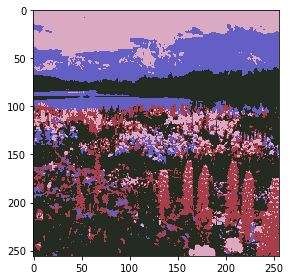

In [342]:
#Implement k-means clustering to form k clusters
kmeans_flowers_4= KMeans(n_clusters=4)
kmeans_flowers_4.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_4 = kmeans_flowers_4.cluster_centers_[kmeans_flowers_4.labels_]
compressed_image_flowers_4  = np.clip(compressed_image_flowers_4.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_4  = compressed_image_flowers_4 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_4.png", compressed_image_flowers_4)
io.imshow(compressed_image_flowers_4)
io.show()

In [58]:
print("image bytes = ",img_bytes('compressed_image_flowers_4.png'))

image bytes =  13548


In [59]:
flowers_4_wcss=wcss(flowers_image,kmeans_flowers_4.cluster_centers_[kmeans_flowers_4.labels_])

In [343]:
flowers_4_bcss=bcss(flowers_image,kmeans_flowers_4.cluster_centers_[kmeans_flowers_4.labels_])

In [506]:
flowers_4_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_4.labels_, metric='euclidean')

In [462]:
names_of_colors(kmeans_flowers_4.cluster_centers_)

Closest Match for the name of  0 th centroid color :  plum
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  sienna
Closest Match for the name of  3 th centroid color :  slateblue


['plum', 'darkslategray', 'sienna', 'slateblue']

## k=8

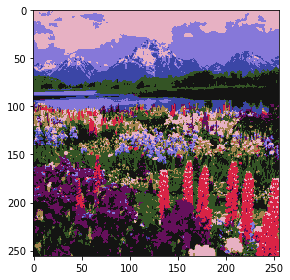

image bytes =  25088


In [60]:
#Implement k-means clustering to form k clusters
kmeans_flowers_8= KMeans(n_clusters=8)
kmeans_flowers_8.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_8 = kmeans_flowers_8.cluster_centers_[kmeans_flowers_8.labels_]
compressed_image_flowers_8  = np.clip(compressed_image_flowers_8.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_8  = compressed_image_flowers_8 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_8.png", compressed_image_flowers_8)
io.imshow(compressed_image_flowers_8)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_8.png'))

In [61]:
flowers_8_wcss=wcss(flowers_image,kmeans_flowers_8.cluster_centers_[kmeans_flowers_8.labels_])

In [344]:
flowers_8_bcss=bcss(flowers_image,kmeans_flowers_8.cluster_centers_[kmeans_flowers_8.labels_])

In [507]:
flowers_8_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_8.labels_, metric='euclidean')

In [463]:
names_of_colors(kmeans_flowers_8.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkolivegreen
Closest Match for the name of  1 th centroid color :  peru
Closest Match for the name of  2 th centroid color :  lightpink
Closest Match for the name of  3 th centroid color :  crimson
Closest Match for the name of  4 th centroid color :  purple
Closest Match for the name of  5 th centroid color :  mediumpurple
Closest Match for the name of  6 th centroid color :  black
Closest Match for the name of  7 th centroid color :  darkslateblue


['darkolivegreen',
 'peru',
 'lightpink',
 'crimson',
 'purple',
 'mediumpurple',
 'black',
 'darkslateblue']

## k=16

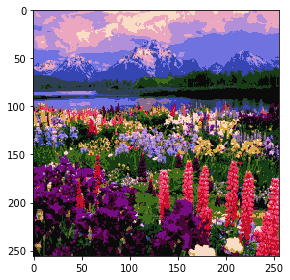

image bytes =  41480


In [62]:
#Implement k-means clustering to form k clusters
kmeans_flowers_16= KMeans(n_clusters=16)
kmeans_flowers_16.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_16 = kmeans_flowers_16.cluster_centers_[kmeans_flowers_16.labels_]
compressed_image_flowers_16  = np.clip(compressed_image_flowers_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_16 = compressed_image_flowers_16 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_16.png", compressed_image_flowers_16)
io.imshow(compressed_image_flowers_16)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_16.png'))

In [63]:
flowers_16_wcss=wcss(flowers_image,kmeans_flowers_16.cluster_centers_[kmeans_flowers_16.labels_])

In [345]:
flowers_16_bcss=bcss(flowers_image,kmeans_flowers_16.cluster_centers_[kmeans_flowers_16.labels_])

In [508]:
flowers_16_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_16.labels_, metric='euclidean')

In [464]:
names_of_colors(kmeans_flowers_16.cluster_centers_)

Closest Match for the name of  0 th centroid color :  black
Closest Match for the name of  1 th centroid color :  bisque
Closest Match for the name of  2 th centroid color :  gray
Closest Match for the name of  3 th centroid color :  sienna
Closest Match for the name of  4 th centroid color :  indianred
Closest Match for the name of  5 th centroid color :  mediumpurple
Closest Match for the name of  6 th centroid color :  purple
Closest Match for the name of  7 th centroid color :  firebrick
Closest Match for the name of  8 th centroid color :  mediumslateblue
Closest Match for the name of  9 th centroid color :  sandybrown
Closest Match for the name of  10 th centroid color :  darkolivegreen
Closest Match for the name of  11 th centroid color :  darkslateblue
Closest Match for the name of  12 th centroid color :  maroon
Closest Match for the name of  13 th centroid color :  darkgreen
Closest Match for the name of  14 th centroid color :  lightpink
Closest Match for the name of  15 th 

['black',
 'bisque',
 'gray',
 'sienna',
 'indianred',
 'mediumpurple',
 'purple',
 'firebrick',
 'mediumslateblue',
 'sandybrown',
 'darkolivegreen',
 'darkslateblue',
 'maroon',
 'darkgreen',
 'lightpink',
 'darkslategray']

## k=32

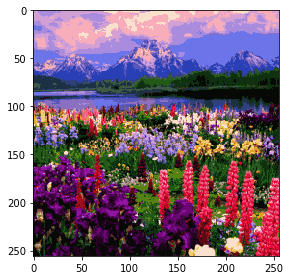

image bytes =  61217


In [64]:
#Implement k-means clustering to form k clusters
kmeans_flowers_32= KMeans(n_clusters=32)
kmeans_flowers_32.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_32 = kmeans_flowers_32.cluster_centers_[kmeans_flowers_32.labels_]
compressed_image_flowers_32 = np.clip(compressed_image_flowers_32.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_32  = compressed_image_flowers_32 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_32.png", compressed_image_flowers_32)
io.imshow(compressed_image_flowers_32)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_32.png'))

In [65]:
flowers_32_wcss=wcss(flowers_image,kmeans_flowers_32.cluster_centers_[kmeans_flowers_32.labels_])

In [346]:
flowers_32_bcss=bcss(flowers_image,kmeans_flowers_32.cluster_centers_[kmeans_flowers_32.labels_])

In [516]:
flowers_32_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_32.labels_, metric='euclidean')

In [465]:
names_of_colors(kmeans_flowers_32.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkslategray
Closest Match for the name of  1 th centroid color :  blanchedalmond
Closest Match for the name of  2 th centroid color :  slateblue
Closest Match for the name of  3 th centroid color :  crimson
Closest Match for the name of  4 th centroid color :  black
Closest Match for the name of  5 th centroid color :  sienna
Closest Match for the name of  6 th centroid color :  plum
Closest Match for the name of  7 th centroid color :  purple
Closest Match for the name of  8 th centroid color :  darkslateblue
Closest Match for the name of  9 th centroid color :  olivedrab
Closest Match for the name of  10 th centroid color :  black
Closest Match for the name of  11 th centroid color :  goldenrod
Closest Match for the name of  12 th centroid color :  dimgray
Closest Match for the name of  13 th centroid color :  maroon
Closest Match for the name of  14 th centroid color :  dimgray
Closest Match for the name of  15 th centroid colo

['darkslategray',
 'blanchedalmond',
 'slateblue',
 'crimson',
 'black',
 'sienna',
 'plum',
 'purple',
 'darkslateblue',
 'olivedrab',
 'black',
 'goldenrod',
 'dimgray',
 'maroon',
 'dimgray',
 'darkgreen',
 'saddlebrown',
 'lightpink',
 'lightcoral',
 'darkslategray',
 'black',
 'mediumslateblue',
 'firebrick',
 'rosybrown',
 'mediumpurple',
 'darkmagenta',
 'indigo',
 'darkolivegreen',
 'burlywood',
 'crimson',
 'mediumpurple',
 'darkslateblue']

## k=64

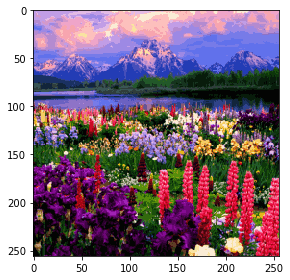

image bytes =  83328


In [66]:
#Implement k-means clustering to form k clusters
kmeans_flowers_64= KMeans(n_clusters=64)
kmeans_flowers_64.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_64= kmeans_flowers_64.cluster_centers_[kmeans_flowers_64.labels_]
compressed_image_flowers_64 = np.clip(compressed_image_flowers_64.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_64= compressed_image_flowers_64.reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_64.png", compressed_image_flowers_64)
io.imshow(compressed_image_flowers_64)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_64.png'))

In [67]:
flowers_64_wcss=wcss(flowers_image,kmeans_flowers_64.cluster_centers_[kmeans_flowers_64.labels_])

In [347]:
flowers_64_bcss=bcss(flowers_image,kmeans_flowers_64.cluster_centers_[kmeans_flowers_64.labels_])

In [509]:
flowers_64_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_64.labels_, metric='euclidean')

In [466]:
names_of_colors(kmeans_flowers_64.cluster_centers_)

Closest Match for the name of  0 th centroid color :  mediumpurple
Closest Match for the name of  1 th centroid color :  darkgreen
Closest Match for the name of  2 th centroid color :  lightpink
Closest Match for the name of  3 th centroid color :  indianred
Closest Match for the name of  4 th centroid color :  darkslateblue
Closest Match for the name of  5 th centroid color :  black
Closest Match for the name of  6 th centroid color :  sienna
Closest Match for the name of  7 th centroid color :  black
Closest Match for the name of  8 th centroid color :  plum
Closest Match for the name of  9 th centroid color :  rosybrown
Closest Match for the name of  10 th centroid color :  brown
Closest Match for the name of  11 th centroid color :  darkolivegreen
Closest Match for the name of  12 th centroid color :  slateblue
Closest Match for the name of  13 th centroid color :  maroon
Closest Match for the name of  14 th centroid color :  sandybrown
Closest Match for the name of  15 th centroid

['mediumpurple',
 'darkgreen',
 'lightpink',
 'indianred',
 'darkslateblue',
 'black',
 'sienna',
 'black',
 'plum',
 'rosybrown',
 'brown',
 'darkolivegreen',
 'slateblue',
 'maroon',
 'sandybrown',
 'mediumslateblue',
 'olive',
 'indigo',
 'olivedrab',
 'crimson',
 'rosybrown',
 'darkslateblue',
 'antiquewhite',
 'plum',
 'saddlebrown',
 'indianred',
 'mediumpurple',
 'dimgray',
 'midnightblue',
 'darkslategray',
 'firebrick',
 'darkmagenta',
 'lightpink',
 'darkslategray',
 'darkslateblue',
 'darkgray',
 'navajowhite',
 'goldenrod',
 'darkorchid',
 'darkgreen',
 'chocolate',
 'forestgreen',
 'darkslategray',
 'thistle',
 'crimson',
 'black',
 'gray',
 'sandybrown',
 'midnightblue',
 'darkslategray',
 'darkslategray',
 'slateblue',
 'dimgray',
 'black',
 'lightpink',
 'crimson',
 'mediumslateblue',
 'purple',
 'mediumpurple',
 'lightcoral',
 'dimgray',
 'peru',
 'midnightblue',
 'black']

## k=128

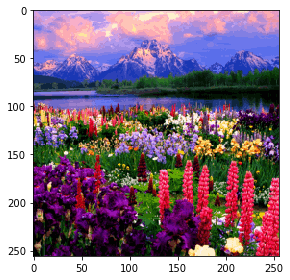

image bytes =  102970


In [68]:
#Implement k-means clustering to form k clusters
kmeans_flowers_128= KMeans(n_clusters=128)
kmeans_flowers_128.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_128 = kmeans_flowers_128.cluster_centers_[kmeans_flowers_128.labels_]
compressed_image_flowers_128  = np.clip(compressed_image_flowers_128.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_128  = compressed_image_flowers_128 .reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_128.png", compressed_image_flowers_128)
io.imshow(compressed_image_flowers_128)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_128.png'))

In [69]:
flowers_128_wcss=wcss(flowers_image,kmeans_flowers_128.cluster_centers_[kmeans_flowers_128.labels_])

In [348]:
flowers_128_bcss=bcss(flowers_image,kmeans_flowers_128.cluster_centers_[kmeans_flowers_128.labels_])

In [510]:
flowers_128_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_128.labels_, metric='euclidean')

In [467]:
names_of_colors(kmeans_flowers_128.cluster_centers_)

Closest Match for the name of  0 th centroid color :  mediumpurple
Closest Match for the name of  1 th centroid color :  black
Closest Match for the name of  2 th centroid color :  darkmagenta
Closest Match for the name of  3 th centroid color :  crimson
Closest Match for the name of  4 th centroid color :  burlywood
Closest Match for the name of  5 th centroid color :  dimgray
Closest Match for the name of  6 th centroid color :  darkolivegreen
Closest Match for the name of  7 th centroid color :  slateblue
Closest Match for the name of  8 th centroid color :  darkgreen
Closest Match for the name of  9 th centroid color :  peru
Closest Match for the name of  10 th centroid color :  brown
Closest Match for the name of  11 th centroid color :  darkslateblue
Closest Match for the name of  12 th centroid color :  mediumslateblue
Closest Match for the name of  13 th centroid color :  midnightblue
Closest Match for the name of  14 th centroid color :  crimson
Closest Match for the name of  

['mediumpurple',
 'black',
 'darkmagenta',
 'crimson',
 'burlywood',
 'dimgray',
 'darkolivegreen',
 'slateblue',
 'darkgreen',
 'peru',
 'brown',
 'darkslateblue',
 'mediumslateblue',
 'midnightblue',
 'crimson',
 'darkslategray',
 'plum',
 'darkgreen',
 'gray',
 'khaki',
 'saddlebrown',
 'black',
 'lightgray',
 'brown',
 'palevioletred',
 'chocolate',
 'olivedrab',
 'plum',
 'darkolivegreen',
 'darkslategray',
 'darkkhaki',
 'olivedrab',
 'lightslategray',
 'dimgray',
 'black',
 'maroon',
 'darkkhaki',
 'firebrick',
 'darkorchid',
 'darkolivegreen',
 'deeppink',
 'midnightblue',
 'forestgreen',
 'pink',
 'indigo',
 'darkslategray',
 'slateblue',
 'sandybrown',
 'darkslateblue',
 'plum',
 'lightcoral',
 'mediumpurple',
 'olive',
 'indianred',
 'black',
 'forestgreen',
 'blanchedalmond',
 'indigo',
 'darkred',
 'darksalmon',
 'darkslategray',
 'darkslategray',
 'royalblue',
 'royalblue',
 'mediumpurple',
 'lightpink',
 'indianred',
 'crimson',
 'darkorchid',
 'maroon',
 'goldenrod',
 '

## k=256

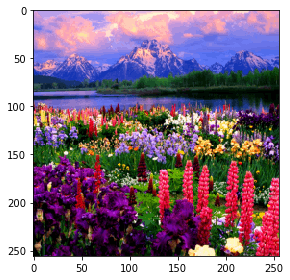

image bytes =  118507


In [70]:
#Implement k-means clustering to form k clusters
kmeans_flowers_256= KMeans(n_clusters=256)
kmeans_flowers_256.fit(flowers_image)

#Replace each pixel value with its nearby centroid
compressed_image_flowers_256 = kmeans_flowers_256.cluster_centers_[kmeans_flowers_256.labels_]
compressed_image_flowers_256  = np.clip(compressed_image_flowers_256.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_flowers_256 = compressed_image_flowers_256.reshape(256,256,3)
#Save and display output image
io.imsave("compressed_image_flowers_256.png", compressed_image_flowers_256)
io.imshow(compressed_image_flowers_256)
io.show()

print("image bytes = ",img_bytes('compressed_image_flowers_256.png'))

In [71]:
flowers_256_wcss=wcss(flowers_image,kmeans_flowers_256.cluster_centers_[kmeans_flowers_256.labels_])

In [349]:
flowers_256_bcss=bcss(flowers_image,kmeans_flowers_256.cluster_centers_[kmeans_flowers_256.labels_])

In [511]:
flowers_256_silhouette=metrics.silhouette_score(flowers_image, kmeans_flowers_256.labels_, metric='euclidean')

In [468]:
names_of_colors(kmeans_flowers_256.cluster_centers_)

Closest Match for the name of  0 th centroid color :  black
Closest Match for the name of  1 th centroid color :  rosybrown
Closest Match for the name of  2 th centroid color :  darkslateblue
Closest Match for the name of  3 th centroid color :  firebrick
Closest Match for the name of  4 th centroid color :  mediumslateblue
Closest Match for the name of  5 th centroid color :  darkslategray
Closest Match for the name of  6 th centroid color :  plum
Closest Match for the name of  7 th centroid color :  black
Closest Match for the name of  8 th centroid color :  crimson
Closest Match for the name of  9 th centroid color :  darkolivegreen
Closest Match for the name of  10 th centroid color :  sienna
Closest Match for the name of  11 th centroid color :  moccasin
Closest Match for the name of  12 th centroid color :  indianred
Closest Match for the name of  13 th centroid color :  darkgreen
Closest Match for the name of  14 th centroid color :  plum
Closest Match for the name of  15 th cen

Closest Match for the name of  149 th centroid color :  lightpink
Closest Match for the name of  150 th centroid color :  mediumslateblue
Closest Match for the name of  151 th centroid color :  dimgray
Closest Match for the name of  152 th centroid color :  darkkhaki
Closest Match for the name of  153 th centroid color :  plum
Closest Match for the name of  154 th centroid color :  maroon
Closest Match for the name of  155 th centroid color :  indigo
Closest Match for the name of  156 th centroid color :  rosybrown
Closest Match for the name of  157 th centroid color :  darkmagenta
Closest Match for the name of  158 th centroid color :  darkolivegreen
Closest Match for the name of  159 th centroid color :  brown
Closest Match for the name of  160 th centroid color :  black
Closest Match for the name of  161 th centroid color :  darkslateblue
Closest Match for the name of  162 th centroid color :  sandybrown
Closest Match for the name of  163 th centroid color :  forestgreen
Closest Mat

['black',
 'rosybrown',
 'darkslateblue',
 'firebrick',
 'mediumslateblue',
 'darkslategray',
 'plum',
 'black',
 'crimson',
 'darkolivegreen',
 'sienna',
 'moccasin',
 'indianred',
 'darkgreen',
 'plum',
 'darkslateblue',
 'peru',
 'darkslateblue',
 'black',
 'gold',
 'maroon',
 'forestgreen',
 'royalblue',
 'lightpink',
 'darkmagenta',
 'slategray',
 'darkslategray',
 'tomato',
 'midnightblue',
 'darkolivegreen',
 'dimgray',
 'goldenrod',
 'mediumpurple',
 'blanchedalmond',
 'olive',
 'gray',
 'purple',
 'mediumslateblue',
 'darkolivegreen',
 'midnightblue',
 'black',
 'darkgreen',
 'crimson',
 'darkslategray',
 'plum',
 'darkred',
 'darkolivegreen',
 'mediumorchid',
 'olivedrab',
 'slateblue',
 'indigo',
 'goldenrod',
 'khaki',
 'black',
 'sienna',
 'darkgreen',
 'tan',
 'darkslateblue',
 'plum',
 'indianred',
 'darkslategray',
 'brown',
 'darkorchid',
 'chocolate',
 'seashell',
 'mediumpurple',
 'saddlebrown',
 'black',
 'indigo',
 'lightpink',
 'olivedrab',
 'thistle',
 'silver',


In [284]:
flowers_wcss=[flowers_2_wcss,flowers_4_wcss,flowers_8_wcss,flowers_16_wcss,flowers_32_wcss,flowers_64_wcss,flowers_128_wcss,flowers_256_wcss]

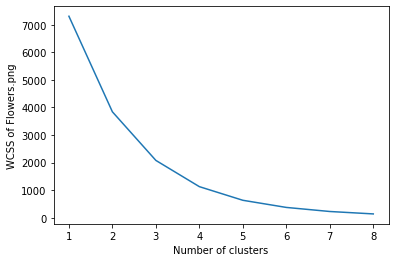

In [286]:
plt.plot(range(1,9), flowers_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS of Flowers.png') 
plt.show()

In [350]:
flowers_bcss=[flowers_2_bcss,flowers_4_bcss,flowers_8_bcss,flowers_16_bcss,flowers_32_bcss,flowers_64_bcss,flowers_128_bcss,flowers_256_bcss]

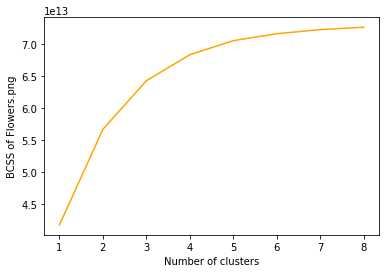

In [364]:
plt.plot(range(1,9), flowers_bcss, c="orange")
plt.xlabel('Number of clusters')
plt.ylabel('BCSS of Flowers.png') 
plt.show()

In [525]:
flowers_silhouette=[flowers_2_silhouette,flowers_4_silhouette,flowers_8_silhouette,flowers_16_silhouette,flowers_32_silhouette,flowers_64_silhouette,flowers_128_silhouette,flowers_256_silhouette]

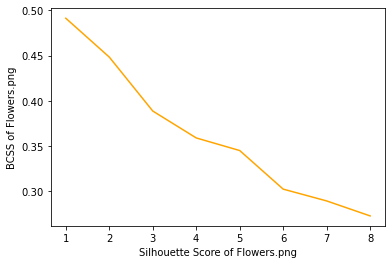

In [526]:
plt.plot(range(1,9), flowers_silhouette, c="orange")
plt.xlabel('Silhouette Score of Flowers.png')
plt.ylabel('BCSS of Flowers.png') 
plt.show()

# Lena

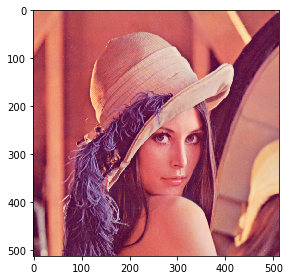

In [111]:
lena_image=image_read('lena.png')

In [ ]:
lena_image=lena_image.astype(int)

In [112]:
lena_image.shape

(512, 512, 3)

In [113]:
#lena_image=resize(lena_image, (256,256),anti_aliasing=True)

In [114]:
#Dimension of the original image
rows_lena = lena_image.shape[0]
cols_lena = lena_image.shape[1]

print(lena_image.shape)

(512, 512, 3)


In [115]:
lena_image = lena_image.reshape(lena_image.shape[0]*lena_image.shape[1], 3)

In [116]:
print("image bytes = ",img_bytes('lena.png'))

print("image unique colors = ",unique_color(lena_image))

image bytes =  473831
image unique colors =  148279


In [117]:
lena_bytes=img_bytes('lena.png')

## k=2

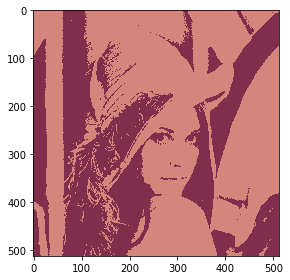

image bytes =  14333


In [118]:
#Implement k-means clustering to form k clusters
kmeans_lena_2= KMeans(n_clusters=2)
kmeans_lena_2.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_2 = kmeans_lena_2.cluster_centers_[kmeans_lena_2.labels_]
compressed_image_lena_2  = np.clip(compressed_image_lena_2 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_2  = compressed_image_lena_2 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_2.png", compressed_image_lena_2 )
io.imshow(compressed_image_lena_2 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_2.png'))    

In [119]:
lena_2_bytes=img_bytes('compressed_image_lena_2.png')

In [120]:
lena_2_wcss=wcss(lena_image,kmeans_lena_2.cluster_centers_[kmeans_lena_2.labels_])

In [352]:
lena_2_bcss=bcss(lena_image,kmeans_lena_2.cluster_centers_[kmeans_lena_2.labels_])

In [517]:
lena_2_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_2.labels_, metric='euclidean')

In [471]:
names_of_colors(kmeans_lena_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darksalmon
Closest Match for the name of  1 th centroid color :  brown


['darksalmon', 'brown']

## k=4

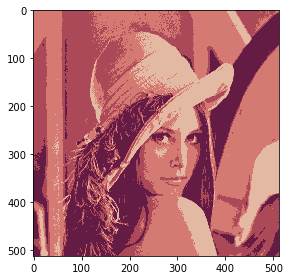

image bytes =  33959


In [121]:
#Implement k-means clustering to form k clusters
kmeans_lena_4= KMeans(n_clusters=4)
kmeans_lena_4.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_4 = kmeans_lena_4.cluster_centers_[kmeans_lena_4.labels_]
compressed_image_lena_4  = np.clip(compressed_image_lena_4 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_4  = compressed_image_lena_4 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_4.png", compressed_image_lena_4 )
io.imshow(compressed_image_lena_4 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_4.png'))    

In [122]:
lena_4_bytes=img_bytes('compressed_image_lena_4.png')

In [123]:
lena_4_wcss=wcss(lena_image,kmeans_lena_4.cluster_centers_[kmeans_lena_4.labels_])

In [353]:
lena_4_bcss=bcss(lena_image,kmeans_lena_4.cluster_centers_[kmeans_lena_4.labels_])

In [518]:
lena_4_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_4.labels_, metric='euclidean')

In [472]:
names_of_colors(kmeans_lena_4.cluster_centers_)

Closest Match for the name of  0 th centroid color :  brown
Closest Match for the name of  1 th centroid color :  burlywood
Closest Match for the name of  2 th centroid color :  indianred
Closest Match for the name of  3 th centroid color :  lightcoral


['brown', 'burlywood', 'indianred', 'lightcoral']

## k=8

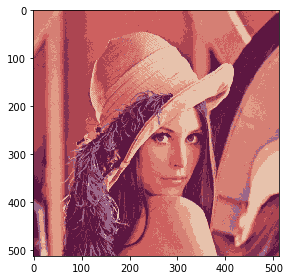

image bytes =  62217


In [124]:
#Implement k-means clustering to form k clusters
kmeans_lena_8= KMeans(n_clusters=8)
kmeans_lena_8.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_8 = kmeans_lena_8.cluster_centers_[kmeans_lena_8.labels_]
compressed_image_lena_8  = np.clip(compressed_image_lena_8 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_8  = compressed_image_lena_8 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_8.png", compressed_image_lena_8 )
io.imshow(compressed_image_lena_8 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_8.png'))    

In [125]:
lena_8_bytes=img_bytes('compressed_image_lena_8.png')

In [126]:
lena_8_wcss=wcss(lena_image,kmeans_lena_8.cluster_centers_[kmeans_lena_8.labels_])

In [354]:
lena_8_bcss=bcss(lena_image,kmeans_lena_8.cluster_centers_[kmeans_lena_8.labels_])

In [519]:
lena_8_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_8.labels_, metric='euclidean')

In [473]:
names_of_colors(kmeans_lena_8.cluster_centers_)

Closest Match for the name of  0 th centroid color :  indigo
Closest Match for the name of  1 th centroid color :  lightcoral
Closest Match for the name of  2 th centroid color :  indianred
Closest Match for the name of  3 th centroid color :  wheat
Closest Match for the name of  4 th centroid color :  brown
Closest Match for the name of  5 th centroid color :  gray
Closest Match for the name of  6 th centroid color :  darksalmon
Closest Match for the name of  7 th centroid color :  indianred


['indigo',
 'lightcoral',
 'indianred',
 'wheat',
 'brown',
 'gray',
 'darksalmon',
 'indianred']

## k=16

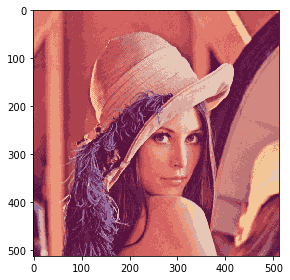

image bytes =  14333


In [127]:
#Implement k-means clustering to form k clusters
kmeans_lena_16= KMeans(n_clusters=16)
kmeans_lena_16.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_16 = kmeans_lena_16.cluster_centers_[kmeans_lena_16.labels_]
compressed_image_lena_16  = np.clip(compressed_image_lena_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_16  = compressed_image_lena_16.reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_16.png", compressed_image_lena_2 )
io.imshow(compressed_image_lena_16 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_16.png'))

In [128]:
lena_16_bytes=img_bytes('compressed_image_lena_16.png')

In [129]:
lena_16_wcss=wcss(lena_image,kmeans_lena_16.cluster_centers_[kmeans_lena_16.labels_])

In [355]:
lena_16_bcss=bcss(lena_image,kmeans_lena_16.cluster_centers_[kmeans_lena_16.labels_])

In [520]:
lena_16_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_16.labels_, metric='euclidean')

In [474]:
names_of_colors(kmeans_lena_16.cluster_centers_)

Closest Match for the name of  0 th centroid color :  burlywood
Closest Match for the name of  1 th centroid color :  sienna
Closest Match for the name of  2 th centroid color :  indigo
Closest Match for the name of  3 th centroid color :  rosybrown
Closest Match for the name of  4 th centroid color :  indianred
Closest Match for the name of  5 th centroid color :  dimgray
Closest Match for the name of  6 th centroid color :  darksalmon
Closest Match for the name of  7 th centroid color :  brown
Closest Match for the name of  8 th centroid color :  rosybrown
Closest Match for the name of  9 th centroid color :  indianred
Closest Match for the name of  10 th centroid color :  lightcoral
Closest Match for the name of  11 th centroid color :  indianred
Closest Match for the name of  12 th centroid color :  brown
Closest Match for the name of  13 th centroid color :  gray
Closest Match for the name of  14 th centroid color :  tan
Closest Match for the name of  15 th centroid color :  wheat

['burlywood',
 'sienna',
 'indigo',
 'rosybrown',
 'indianred',
 'dimgray',
 'darksalmon',
 'brown',
 'rosybrown',
 'indianred',
 'lightcoral',
 'indianred',
 'brown',
 'gray',
 'tan',
 'wheat']

## k=32

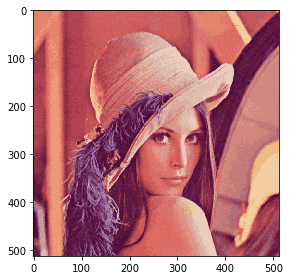

image bytes =  165153


In [130]:
#Implement k-means clustering to form k clusters
kmeans_lena_32= KMeans(n_clusters=32)
kmeans_lena_32.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_32 = kmeans_lena_32.cluster_centers_[kmeans_lena_32.labels_]
compressed_image_lena_32  = np.clip(compressed_image_lena_32 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_32  = compressed_image_lena_32 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_32.png", compressed_image_lena_32 )
io.imshow(compressed_image_lena_32 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_32.png'))

In [131]:
lena_32_bytes=img_bytes('compressed_image_lena_32.png')

In [132]:
lena_32_wcss=wcss(lena_image,kmeans_lena_32.cluster_centers_[kmeans_lena_32.labels_])

In [356]:
lena_32_bcss=bcss(lena_image,kmeans_lena_32.cluster_centers_[kmeans_lena_32.labels_])

In [521]:
lena_32_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_32.labels_, metric='euclidean')

In [475]:
names_of_colors(kmeans_lena_32.cluster_centers_)

Closest Match for the name of  0 th centroid color :  indianred
Closest Match for the name of  1 th centroid color :  indigo
Closest Match for the name of  2 th centroid color :  lightpink
Closest Match for the name of  3 th centroid color :  brown
Closest Match for the name of  4 th centroid color :  rosybrown
Closest Match for the name of  5 th centroid color :  darksalmon
Closest Match for the name of  6 th centroid color :  indianred
Closest Match for the name of  7 th centroid color :  dimgray
Closest Match for the name of  8 th centroid color :  rosybrown
Closest Match for the name of  9 th centroid color :  gray
Closest Match for the name of  10 th centroid color :  brown
Closest Match for the name of  11 th centroid color :  darksalmon
Closest Match for the name of  12 th centroid color :  darksalmon
Closest Match for the name of  13 th centroid color :  burlywood
Closest Match for the name of  14 th centroid color :  indianred
Closest Match for the name of  15 th centroid colo

['indianred',
 'indigo',
 'lightpink',
 'brown',
 'rosybrown',
 'darksalmon',
 'indianred',
 'dimgray',
 'rosybrown',
 'gray',
 'brown',
 'darksalmon',
 'darksalmon',
 'burlywood',
 'indianred',
 'lightcoral',
 'brown',
 'indianred',
 'rosybrown',
 'brown',
 'indianred',
 'tan',
 'navajowhite',
 'indigo',
 'purple',
 'indianred',
 'sienna',
 'rosybrown',
 'indianred',
 'wheat',
 'dimgray',
 'indianred']

## k=64

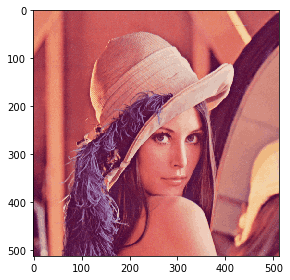

image bytes =  248062


In [133]:
#Implement k-means clustering to form k clusters
kmeans_lena_64= KMeans(n_clusters=64)
kmeans_lena_64.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_64 = kmeans_lena_64.cluster_centers_[kmeans_lena_64.labels_]
compressed_image_lena_64  = np.clip(compressed_image_lena_64 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_64  = compressed_image_lena_64 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_64.png", compressed_image_lena_64 )
io.imshow(compressed_image_lena_64 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_64.png')) 

In [134]:
lena_64_bytes=img_bytes('compressed_image_lena_64.png')

In [135]:
lena_64_wcss=wcss(lena_image,kmeans_lena_64.cluster_centers_[kmeans_lena_64.labels_])

In [357]:
lena_64_bcss=bcss(lena_image,kmeans_lena_64.cluster_centers_[kmeans_lena_64.labels_])

In [522]:
lena_64_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_64.labels_, metric='euclidean')

In [476]:
names_of_colors(kmeans_lena_64.cluster_centers_)

Closest Match for the name of  0 th centroid color :  khaki
Closest Match for the name of  1 th centroid color :  indianred
Closest Match for the name of  2 th centroid color :  indigo
Closest Match for the name of  3 th centroid color :  rosybrown
Closest Match for the name of  4 th centroid color :  indianred
Closest Match for the name of  5 th centroid color :  tan
Closest Match for the name of  6 th centroid color :  sienna
Closest Match for the name of  7 th centroid color :  gray
Closest Match for the name of  8 th centroid color :  darksalmon
Closest Match for the name of  9 th centroid color :  indianred
Closest Match for the name of  10 th centroid color :  brown
Closest Match for the name of  11 th centroid color :  wheat
Closest Match for the name of  12 th centroid color :  indianred
Closest Match for the name of  13 th centroid color :  rosybrown
Closest Match for the name of  14 th centroid color :  dimgray
Closest Match for the name of  15 th centroid color :  gray
Close

['khaki',
 'indianred',
 'indigo',
 'rosybrown',
 'indianred',
 'tan',
 'sienna',
 'gray',
 'darksalmon',
 'indianred',
 'brown',
 'wheat',
 'indianred',
 'rosybrown',
 'dimgray',
 'gray',
 'lightcoral',
 'darksalmon',
 'brown',
 'indianred',
 'tan',
 'indigo',
 'indianred',
 'rosybrown',
 'thistle',
 'sienna',
 'brown',
 'maroon',
 'indianred',
 'darksalmon',
 'burlywood',
 'sienna',
 'rosybrown',
 'indianred',
 'purple',
 'burlywood',
 'wheat',
 'indigo',
 'indianred',
 'darksalmon',
 'darksalmon',
 'darksalmon',
 'indianred',
 'lightslategray',
 'indianred',
 'darkgray',
 'indianred',
 'indianred',
 'rosybrown',
 'rosybrown',
 'lightcoral',
 'brown',
 'indigo',
 'dimgray',
 'brown',
 'indianred',
 'sienna',
 'navajowhite',
 'indianred',
 'lightpink',
 'salmon',
 'brown',
 'dimgray',
 'dimgray']

## k=128

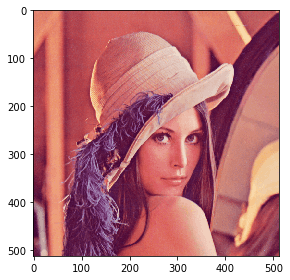

image bytes =  336792


In [136]:
#Implement k-means clustering to form k clusters
kmeans_lena_128= KMeans(n_clusters=128)
kmeans_lena_128.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_128 = kmeans_lena_128.cluster_centers_[kmeans_lena_128.labels_]
compressed_image_lena_128  = np.clip(compressed_image_lena_128 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_128  = compressed_image_lena_128 .reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_128.png", compressed_image_lena_128 )
io.imshow(compressed_image_lena_128 )
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_128.png'))    

In [137]:
lena_128_bytes=img_bytes('compressed_image_lena_128.png')

In [138]:
lena_128_wcss=wcss(lena_image,kmeans_lena_128.cluster_centers_[kmeans_lena_128.labels_])

In [358]:
lena_128_bcss=bcss(lena_image,kmeans_lena_128.cluster_centers_[kmeans_lena_128.labels_])

In [523]:
lena_128_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_128.labels_, metric='euclidean')

In [477]:
names_of_colors(kmeans_lena_128.cluster_centers_)

Closest Match for the name of  0 th centroid color :  sienna
Closest Match for the name of  1 th centroid color :  tan
Closest Match for the name of  2 th centroid color :  maroon
Closest Match for the name of  3 th centroid color :  indianred
Closest Match for the name of  4 th centroid color :  rosybrown
Closest Match for the name of  5 th centroid color :  thistle
Closest Match for the name of  6 th centroid color :  darksalmon
Closest Match for the name of  7 th centroid color :  gray
Closest Match for the name of  8 th centroid color :  indianred
Closest Match for the name of  9 th centroid color :  dimgray
Closest Match for the name of  10 th centroid color :  burlywood
Closest Match for the name of  11 th centroid color :  indianred
Closest Match for the name of  12 th centroid color :  lightcoral
Closest Match for the name of  13 th centroid color :  brown
Closest Match for the name of  14 th centroid color :  indianred
Closest Match for the name of  15 th centroid color :  bro

['sienna',
 'tan',
 'maroon',
 'indianred',
 'rosybrown',
 'thistle',
 'darksalmon',
 'gray',
 'indianred',
 'dimgray',
 'burlywood',
 'indianred',
 'lightcoral',
 'brown',
 'indianred',
 'brown',
 'maroon',
 'rosybrown',
 'dimgray',
 'silver',
 'darkgray',
 'darkgray',
 'indianred',
 'indianred',
 'darksalmon',
 'indianred',
 'indianred',
 'burlywood',
 'dimgray',
 'lightpink',
 'indigo',
 'indigo',
 'rosybrown',
 'rosybrown',
 'burlywood',
 'brown',
 'gray',
 'indianred',
 'peachpuff',
 'darkslateblue',
 'brown',
 'tan',
 'lightslategray',
 'salmon',
 'darksalmon',
 'brown',
 'rosybrown',
 'darksalmon',
 'brown',
 'darkgray',
 'dimgray',
 'indianred',
 'indigo',
 'indianred',
 'rosybrown',
 'indianred',
 'bisque',
 'navajowhite',
 'navajowhite',
 'sienna',
 'lightcoral',
 'darksalmon',
 'darksalmon',
 'rosybrown',
 'brown',
 'indianred',
 'sienna',
 'palevioletred',
 'indianred',
 'indianred',
 'palevioletred',
 'indigo',
 'indigo',
 'tan',
 'indianred',
 'dimgray',
 'lightcoral',
 '

## k=256

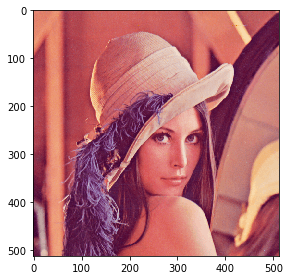

image bytes =  408942


In [139]:
#Implement k-means clustering to form k clusters
kmeans_lena_256= KMeans(n_clusters=256)
kmeans_lena_256.fit(lena_image)

#Replace each pixel value with its nearby centroid
compressed_image_lena_256 = kmeans_lena_256.cluster_centers_[kmeans_lena_256.labels_]
compressed_image_lena_256= np.clip(compressed_image_lena_256.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_lena_256= compressed_image_lena_256.reshape(rows_lena,cols_lena,3)
#Save and display output image
io.imsave("compressed_image_lena_256.png", compressed_image_lena_256)
io.imshow(compressed_image_lena_256)
io.show()
print("image bytes = ",img_bytes('compressed_image_lena_256.png'))    

In [140]:
lena_256_bytes=img_bytes('compressed_image_lena_256.png')

In [141]:
lena_256_wcss=wcss(lena_image,kmeans_lena_256.cluster_centers_[kmeans_lena_256.labels_])

In [360]:
lena_256_bcss=bcss(lena_image,kmeans_lena_256.cluster_centers_[kmeans_lena_256.labels_])

In [524]:
lena_256_silhouette=metrics.silhouette_score(lena_image, kmeans_lena_256.labels_, metric='euclidean')

In [478]:
names_of_colors(kmeans_lena_256.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darksalmon
Closest Match for the name of  1 th centroid color :  brown
Closest Match for the name of  2 th centroid color :  indianred
Closest Match for the name of  3 th centroid color :  wheat
Closest Match for the name of  4 th centroid color :  indigo
Closest Match for the name of  5 th centroid color :  brown
Closest Match for the name of  6 th centroid color :  dimgray
Closest Match for the name of  7 th centroid color :  rosybrown
Closest Match for the name of  8 th centroid color :  darkgray
Closest Match for the name of  9 th centroid color :  indianred
Closest Match for the name of  10 th centroid color :  indianred
Closest Match for the name of  11 th centroid color :  dimgray
Closest Match for the name of  12 th centroid color :  lightgray
Closest Match for the name of  13 th centroid color :  burlywood
Closest Match for the name of  14 th centroid color :  rosybrown
Closest Match for the name of  15 th centroid color : 

Closest Match for the name of  158 th centroid color :  salmon
Closest Match for the name of  159 th centroid color :  brown
Closest Match for the name of  160 th centroid color :  maroon
Closest Match for the name of  161 th centroid color :  burlywood
Closest Match for the name of  162 th centroid color :  tan
Closest Match for the name of  163 th centroid color :  darksalmon
Closest Match for the name of  164 th centroid color :  indianred
Closest Match for the name of  165 th centroid color :  lightslategray
Closest Match for the name of  166 th centroid color :  brown
Closest Match for the name of  167 th centroid color :  brown
Closest Match for the name of  168 th centroid color :  rosybrown
Closest Match for the name of  169 th centroid color :  maroon
Closest Match for the name of  170 th centroid color :  indianred
Closest Match for the name of  171 th centroid color :  maroon
Closest Match for the name of  172 th centroid color :  indianred
Closest Match for the name of  173

['darksalmon',
 'brown',
 'indianred',
 'wheat',
 'indigo',
 'brown',
 'dimgray',
 'rosybrown',
 'darkgray',
 'indianred',
 'indianred',
 'dimgray',
 'lightgray',
 'burlywood',
 'rosybrown',
 'brown',
 'darksalmon',
 'indigo',
 'rosybrown',
 'darksalmon',
 'sienna',
 'dimgray',
 'rosybrown',
 'tan',
 'maroon',
 'indianred',
 'indianred',
 'brown',
 'indianred',
 'rosybrown',
 'darksalmon',
 'burlywood',
 'lightpink',
 'indianred',
 'indigo',
 'indianred',
 'lightpink',
 'brown',
 'lightcoral',
 'darkgray',
 'tan',
 'dimgray',
 'indianred',
 'palevioletred',
 'gray',
 'indianred',
 'gray',
 'darkslategray',
 'indianred',
 'indianred',
 'lightcoral',
 'dimgray',
 'darksalmon',
 'lightgray',
 'khaki',
 'burlywood',
 'brown',
 'brown',
 'purple',
 'indianred',
 'darksalmon',
 'indianred',
 'sienna',
 'burlywood',
 'sienna',
 'darksalmon',
 'rosybrown',
 'dimgray',
 'midnightblue',
 'indianred',
 'rosybrown',
 'navajowhite',
 'dimgray',
 'dimgray',
 'indianred',
 'tan',
 'wheat',
 'brown',


In [287]:
lena_wcss=[lena_2_wcss,lena_4_wcss,lena_8_wcss,lena_16_wcss,lena_32_wcss,lena_64_wcss,lena_128_wcss,lena_256_wcss]

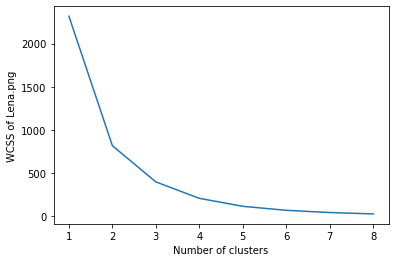

In [288]:
plt.plot(range(1,9), lena_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS of Lena.png') 
plt.show()

In [361]:
lena_bcss=[lena_2_bcss,lena_4_bcss,lena_8_bcss,lena_16_bcss,lena_32_bcss,lena_64_bcss,lena_128_bcss,lena_256_bcss]

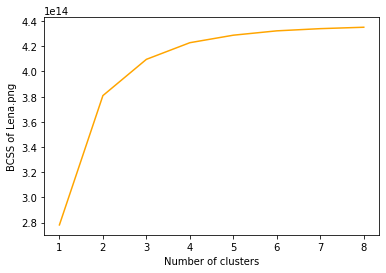

In [365]:
plt.plot(range(1,9), lena_bcss, c="orange")
plt.xlabel('Number of clusters')
plt.ylabel('BCSS of Lena.png') 
plt.show()

# Umbrella

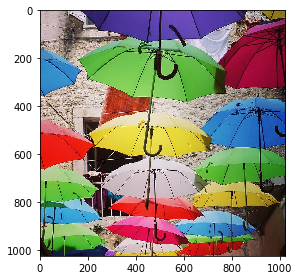

In [188]:
umb_image=image_read('umbrella.png')

In [ ]:
umb_image=umb_image.astype(int)

In [189]:
#umb_image=resize(umb_image, (256,256),anti_aliasing=True)

In [190]:
#Dimension of the original image
rows_umb = umb_image.shape[0]
cols_umb = umb_image.shape[1]

print(umb_image.shape)

(1024, 1024, 3)


In [191]:
umb_image = umb_image.reshape(rows_umb*cols_umb, 3)

In [192]:
print("image bytes = ",img_bytes('umbrella.png'))

print("image unique colors = ",unique_color(umb_image))

image bytes =  1658471
image unique colors =  289892


In [193]:
umb_bytes=img_bytes('umbrella.png')

## k=2

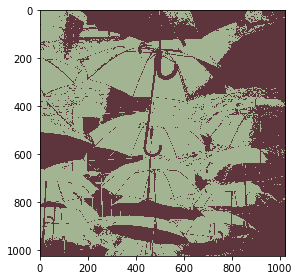

image bytes =  60378


In [194]:
#Implement k-means clustering to form k clusters
kmeans_umb_2= KMeans(n_clusters=2)
kmeans_umb_2.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_2 = kmeans_umb_2.cluster_centers_[kmeans_umb_2.labels_]
compressed_image_umb_2  = np.clip(compressed_image_umb_2 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_2  = compressed_image_umb_2 .reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_2.png", compressed_image_umb_2 )
io.imshow(compressed_image_umb_2 )
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_2.png')) 

In [195]:
umb_2_bytes=img_bytes('compressed_image_umb_2.png')

In [196]:
umb_2_wcss=wcss(umb_image,kmeans_umb_2.cluster_centers_[kmeans_umb_2.labels_])

In [366]:
umb_2_bcss=bcss(umb_image,kmeans_umb_2.cluster_centers_[kmeans_umb_2.labels_])

In [ ]:
umb_2_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_2.labels_, metric='euclidean')

In [479]:
names_of_colors(kmeans_umb_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkseagreen
Closest Match for the name of  1 th centroid color :  darkolivegreen


['darkseagreen', 'darkolivegreen']

## k=4

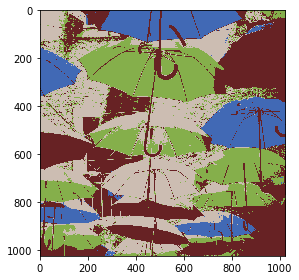

image bytes =  99851


In [197]:
#Implement k-means clustering to form k clusters
kmeans_umb_4= KMeans(n_clusters=4)
kmeans_umb_4.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_4 = kmeans_umb_4.cluster_centers_[kmeans_umb_4.labels_]
compressed_image_umb_4  = np.clip(compressed_image_umb_4 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_4= compressed_image_umb_4.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_4.png", compressed_image_umb_4)
io.imshow(compressed_image_umb_4 )
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_4.png')) 

In [198]:
umb_4_bytes=img_bytes('compressed_image_umb_4.png')

In [199]:
umb_4_wcss=wcss(umb_image,kmeans_umb_4.cluster_centers_[kmeans_umb_4.labels_])

In [367]:
umb_4_bcss=bcss(umb_image,kmeans_umb_4.cluster_centers_[kmeans_umb_4.labels_])

In [ ]:
umb_4_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_4.labels_, metric='euclidean')

In [480]:
names_of_colors(kmeans_umb_4.cluster_centers_)

Closest Match for the name of  0 th centroid color :  saddlebrown
Closest Match for the name of  1 th centroid color :  silver
Closest Match for the name of  2 th centroid color :  yellowgreen
Closest Match for the name of  3 th centroid color :  steelblue


['saddlebrown', 'silver', 'yellowgreen', 'steelblue']

## k=8

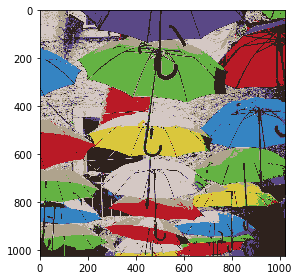

image bytes =  153926


In [200]:
#Implement k-means clustering to form k clusters
kmeans_umb_8= KMeans(n_clusters=8)
kmeans_umb_8.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_8 = kmeans_umb_8.cluster_centers_[kmeans_umb_8.labels_]
compressed_image_umb_8 = np.clip(compressed_image_umb_8.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_8= compressed_image_umb_8.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_8.png", compressed_image_umb_8)
io.imshow(compressed_image_umb_8)
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_8.png')) 

In [201]:
umb_8_bytes=img_bytes('compressed_image_umb_8.png')

In [202]:
umb_8_wcss=wcss(umb_image,kmeans_umb_8.cluster_centers_[kmeans_umb_8.labels_])

In [368]:
umb_8_bcss=bcss(umb_image,kmeans_umb_8.cluster_centers_[kmeans_umb_8.labels_])

In [ ]:
umb_8_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_8.labels_, metric='euclidean')

In [481]:
names_of_colors(kmeans_umb_8.cluster_centers_)

Closest Match for the name of  0 th centroid color :  rosybrown
Closest Match for the name of  1 th centroid color :  black
Closest Match for the name of  2 th centroid color :  steelblue
Closest Match for the name of  3 th centroid color :  firebrick
Closest Match for the name of  4 th centroid color :  darkslateblue
Closest Match for the name of  5 th centroid color :  lightgray
Closest Match for the name of  6 th centroid color :  olivedrab
Closest Match for the name of  7 th centroid color :  goldenrod


['rosybrown',
 'black',
 'steelblue',
 'firebrick',
 'darkslateblue',
 'lightgray',
 'olivedrab',
 'goldenrod']

## k=16

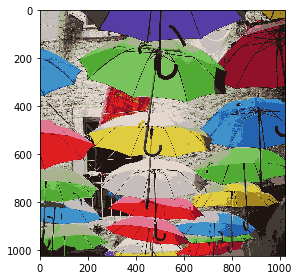

image bytes =  244031


In [203]:
#Implement k-means clustering to form k clusters
kmeans_umb_16= KMeans(n_clusters=16)
kmeans_umb_16.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_16= kmeans_umb_16.cluster_centers_[kmeans_umb_16.labels_]
compressed_image_umb_16= np.clip(compressed_image_umb_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_16= compressed_image_umb_16.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_16.png", compressed_image_umb_16)
io.imshow(compressed_image_umb_16)
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_16.png')) 

In [204]:
umb_16_bytes=img_bytes('compressed_image_umb_16.png')

In [205]:
umb_16_wcss=wcss(umb_image,kmeans_umb_16.cluster_centers_[kmeans_umb_16.labels_])

In [369]:
umb_16_bcss=bcss(umb_image,kmeans_umb_16.cluster_centers_[kmeans_umb_16.labels_])

In [ ]:
umb_16_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_16.labels_, metric='euclidean')

In [482]:
names_of_colors(kmeans_umb_16.cluster_centers_)

Closest Match for the name of  0 th centroid color :  steelblue
Closest Match for the name of  1 th centroid color :  yellowgreen
Closest Match for the name of  2 th centroid color :  brown
Closest Match for the name of  3 th centroid color :  darkslategray
Closest Match for the name of  4 th centroid color :  black
Closest Match for the name of  5 th centroid color :  olivedrab
Closest Match for the name of  6 th centroid color :  gainsboro
Closest Match for the name of  7 th centroid color :  crimson
Closest Match for the name of  8 th centroid color :  goldenrod
Closest Match for the name of  9 th centroid color :  steelblue
Closest Match for the name of  10 th centroid color :  darkgray
Closest Match for the name of  11 th centroid color :  darkgoldenrod
Closest Match for the name of  12 th centroid color :  dimgray
Closest Match for the name of  13 th centroid color :  darkslateblue
Closest Match for the name of  14 th centroid color :  palevioletred
Closest Match for the name of 

['steelblue',
 'yellowgreen',
 'brown',
 'darkslategray',
 'black',
 'olivedrab',
 'gainsboro',
 'crimson',
 'goldenrod',
 'steelblue',
 'darkgray',
 'darkgoldenrod',
 'dimgray',
 'darkslateblue',
 'palevioletred',
 'silver']

## k=32

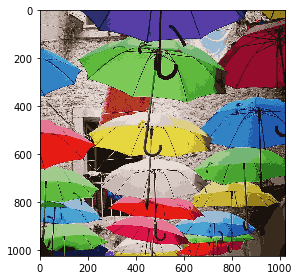

image bytes =  358382


In [206]:
#Implement k-means clustering to form k clusters
kmeans_umb_32= KMeans(n_clusters=32)
kmeans_umb_32.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_32 = kmeans_umb_32.cluster_centers_[kmeans_umb_32.labels_]
compressed_image_umb_32  = np.clip(compressed_image_umb_32 .astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_32  = compressed_image_umb_32 .reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_32.png", compressed_image_umb_32 )
io.imshow(compressed_image_umb_32 )
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_32.png')) 

In [207]:
umb_32_bytes=img_bytes('compressed_image_umb_32.png')

In [208]:
umb_32_wcss=wcss(umb_image,kmeans_umb_32.cluster_centers_[kmeans_umb_32.labels_])

In [370]:
umb_32_bcss=bcss(umb_image,kmeans_umb_32.cluster_centers_[kmeans_umb_32.labels_])

In [ ]:
umb_32_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_32.labels_, metric='euclidean')

In [483]:
names_of_colors(kmeans_umb_32.cluster_centers_)

Closest Match for the name of  0 th centroid color :  black
Closest Match for the name of  1 th centroid color :  silver
Closest Match for the name of  2 th centroid color :  steelblue
Closest Match for the name of  3 th centroid color :  goldenrod
Closest Match for the name of  4 th centroid color :  crimson
Closest Match for the name of  5 th centroid color :  limegreen
Closest Match for the name of  6 th centroid color :  brown
Closest Match for the name of  7 th centroid color :  midnightblue
Closest Match for the name of  8 th centroid color :  brown
Closest Match for the name of  9 th centroid color :  darkslateblue
Closest Match for the name of  10 th centroid color :  gray
Closest Match for the name of  11 th centroid color :  forestgreen
Closest Match for the name of  12 th centroid color :  goldenrod
Closest Match for the name of  13 th centroid color :  darkseagreen
Closest Match for the name of  14 th centroid color :  palevioletred
Closest Match for the name of  15 th cent

['black',
 'silver',
 'steelblue',
 'goldenrod',
 'crimson',
 'limegreen',
 'brown',
 'midnightblue',
 'brown',
 'darkslateblue',
 'gray',
 'forestgreen',
 'goldenrod',
 'darkseagreen',
 'palevioletred',
 'lightgray',
 'lightsteelblue',
 'darkolivegreen',
 'cornflowerblue',
 'darkslategray',
 'olive',
 'darkgray',
 'yellowgreen',
 'olivedrab',
 'burlywood',
 'gainsboro',
 'steelblue',
 'crimson',
 'dimgray',
 'maroon',
 'darkseagreen',
 'midnightblue']

## k=64

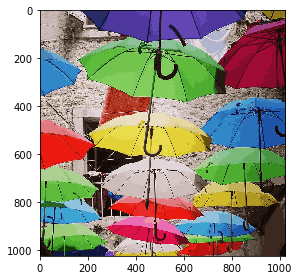

image bytes =  519790


In [209]:
#Implement k-means clustering to form k clusters
kmeans_umb_64= KMeans(n_clusters=64)
kmeans_umb_64.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_64= kmeans_umb_64.cluster_centers_[kmeans_umb_64.labels_]
compressed_image_umb_64= np.clip(compressed_image_umb_64.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_64= compressed_image_umb_64.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_64.png", compressed_image_umb_64)
io.imshow(compressed_image_umb_64)
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_64.png')) 

In [210]:
umb_64_bytes=img_bytes('compressed_image_umb_64.png')

In [211]:
umb_64_wcss=wcss(umb_image,kmeans_umb_64.cluster_centers_[kmeans_umb_64.labels_])

In [371]:
umb_64_bcss=bcss(umb_image,kmeans_umb_64.cluster_centers_[kmeans_umb_64.labels_])

In [ ]:
umb_64_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_64.labels_, metric='euclidean')

In [484]:
names_of_colors(kmeans_umb_64.cluster_centers_)

Closest Match for the name of  0 th centroid color :  lightgray
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  yellowgreen
Closest Match for the name of  3 th centroid color :  steelblue
Closest Match for the name of  4 th centroid color :  firebrick
Closest Match for the name of  5 th centroid color :  black
Closest Match for the name of  6 th centroid color :  goldenrod
Closest Match for the name of  7 th centroid color :  slateblue
Closest Match for the name of  8 th centroid color :  gray
Closest Match for the name of  9 th centroid color :  forestgreen
Closest Match for the name of  10 th centroid color :  limegreen
Closest Match for the name of  11 th centroid color :  red
Closest Match for the name of  12 th centroid color :  indianred
Closest Match for the name of  13 th centroid color :  brown
Closest Match for the name of  14 th centroid color :  darkgray
Closest Match for the name of  15 th centroid c

['lightgray',
 'darkslategray',
 'yellowgreen',
 'steelblue',
 'firebrick',
 'black',
 'goldenrod',
 'slateblue',
 'gray',
 'forestgreen',
 'limegreen',
 'red',
 'indianred',
 'brown',
 'darkgray',
 'cornflowerblue',
 'darkslategray',
 'olive',
 'midnightblue',
 'wheat',
 'darkslateblue',
 'darkseagreen',
 'darksalmon',
 'crimson',
 'dimgray',
 'skyblue',
 'brown',
 'darkslateblue',
 'burlywood',
 'steelblue',
 'brown',
 'black',
 'midnightblue',
 'limegreen',
 'darkseagreen',
 'darkgreen',
 'darkgoldenrod',
 'darkgray',
 'yellowgreen',
 'gainsboro',
 'silver',
 'saddlebrown',
 'goldenrod',
 'lightcoral',
 'brown',
 'black',
 'mediumvioletred',
 'darkseagreen',
 'darkseagreen',
 'forestgreen',
 'hotpink',
 'darkkhaki',
 'linen',
 'darkolivegreen',
 'silver',
 'maroon',
 'palegoldenrod',
 'crimson',
 'sandybrown',
 'mediumseagreen',
 'steelblue',
 'steelblue',
 'seagreen',
 'rosybrown']

## k=128

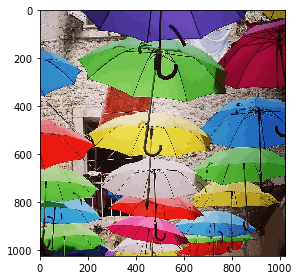

image bytes =  714601


In [212]:
#Implement k-means clustering to form k clusters
kmeans_umb_128= KMeans(n_clusters=128)
kmeans_umb_128.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_128= kmeans_umb_128.cluster_centers_[kmeans_umb_128.labels_]
compressed_image_umb_128= np.clip(compressed_image_umb_128.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_128= compressed_image_umb_128.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_128.png", compressed_image_umb_128)
io.imshow(compressed_image_umb_128)
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_128.png')) 

In [213]:
umb_128_bytes=img_bytes('compressed_image_umb_128.png')

In [214]:
umb_128_wcss=wcss(umb_image,kmeans_umb_128.cluster_centers_[kmeans_umb_128.labels_])

In [372]:
umb_128_bcss=bcss(umb_image,kmeans_umb_128.cluster_centers_[kmeans_umb_128.labels_])

In [ ]:
umb_128_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_128.labels_, metric='euclidean')

In [485]:
names_of_colors(kmeans_umb_128.cluster_centers_)

Closest Match for the name of  0 th centroid color :  lightgray
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  darkseagreen
Closest Match for the name of  3 th centroid color :  darkred
Closest Match for the name of  4 th centroid color :  steelblue
Closest Match for the name of  5 th centroid color :  yellowgreen
Closest Match for the name of  6 th centroid color :  crimson
Closest Match for the name of  7 th centroid color :  darkolivegreen
Closest Match for the name of  8 th centroid color :  goldenrod
Closest Match for the name of  9 th centroid color :  darkslateblue
Closest Match for the name of  10 th centroid color :  lightcoral
Closest Match for the name of  11 th centroid color :  black
Closest Match for the name of  12 th centroid color :  limegreen
Closest Match for the name of  13 th centroid color :  brown
Closest Match for the name of  14 th centroid color :  cornflowerblue
Closest Match for the n

['lightgray',
 'darkslategray',
 'darkseagreen',
 'darkred',
 'steelblue',
 'yellowgreen',
 'crimson',
 'darkolivegreen',
 'goldenrod',
 'darkslateblue',
 'lightcoral',
 'black',
 'limegreen',
 'brown',
 'cornflowerblue',
 'goldenrod',
 'limegreen',
 'darkgray',
 'darkslateblue',
 'steelblue',
 'rosybrown',
 'antiquewhite',
 'midnightblue',
 'gray',
 'indianred',
 'darkseagreen',
 'crimson',
 'olive',
 'silver',
 'darkolivegreen',
 'burlywood',
 'steelblue',
 'black',
 'darkseagreen',
 'maroon',
 'red',
 'firebrick',
 'purple',
 'darkseagreen',
 'darkolivegreen',
 'saddlebrown',
 'hotpink',
 'dimgray',
 'silver',
 'midnightblue',
 'darkgreen',
 'darkkhaki',
 'cornflowerblue',
 'brown',
 'khaki',
 'darkslategray',
 'black',
 'steelblue',
 'yellowgreen',
 'dimgray',
 'lightgray',
 'yellowgreen',
 'thistle',
 'palevioletred',
 'sandybrown',
 'skyblue',
 'darkgray',
 'darkgoldenrod',
 'firebrick',
 'mediumvioletred',
 'linen',
 'mediumorchid',
 'mediumseagreen',
 'darkslateblue',
 'slatebl

## k=256

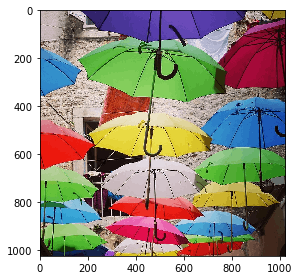

image bytes =  922671


In [215]:
#Implement k-means clustering to form k clusters
kmeans_umb_256= KMeans(n_clusters=256)
kmeans_umb_256.fit(umb_image)

#Replace each pixel value with its nearby centroid
compressed_image_umb_256= kmeans_umb_256.cluster_centers_[kmeans_umb_256.labels_]
compressed_image_umb_256= np.clip(compressed_image_umb_256.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_umb_256= compressed_image_umb_256.reshape(rows_umb,cols_umb,3)
#Save and display output image
io.imsave("compressed_image_umb_256.png", compressed_image_umb_256)
io.imshow(compressed_image_umb_256)
io.show()
print("image bytes = ",img_bytes('compressed_image_umb_256.png')) 

In [216]:
umb_256_bytes=img_bytes('compressed_image_umb_256.png')

In [217]:
umb_256_wcss=wcss(umb_image,kmeans_umb_256.cluster_centers_[kmeans_umb_256.labels_])

In [373]:
umb_256_bcss=bcss(umb_image,kmeans_umb_256.cluster_centers_[kmeans_umb_256.labels_])

In [ ]:
umb_256_silhouette=metrics.silhouette_score(umb_image, kmeans_umb_256.labels_, metric='euclidean')

In [486]:
names_of_colors(kmeans_umb_256.cluster_centers_)

Closest Match for the name of  0 th centroid color :  crimson
Closest Match for the name of  1 th centroid color :  powderblue
Closest Match for the name of  2 th centroid color :  darkolivegreen
Closest Match for the name of  3 th centroid color :  steelblue
Closest Match for the name of  4 th centroid color :  black
Closest Match for the name of  5 th centroid color :  limegreen
Closest Match for the name of  6 th centroid color :  goldenrod
Closest Match for the name of  7 th centroid color :  gainsboro
Closest Match for the name of  8 th centroid color :  brown
Closest Match for the name of  9 th centroid color :  gray
Closest Match for the name of  10 th centroid color :  yellowgreen
Closest Match for the name of  11 th centroid color :  cornflowerblue
Closest Match for the name of  12 th centroid color :  darksalmon
Closest Match for the name of  13 th centroid color :  darkslateblue
Closest Match for the name of  14 th centroid color :  mediumturquoise
Closest Match for the name

Closest Match for the name of  148 th centroid color :  darkseagreen
Closest Match for the name of  149 th centroid color :  darkslategray
Closest Match for the name of  150 th centroid color :  steelblue
Closest Match for the name of  151 th centroid color :  firebrick
Closest Match for the name of  152 th centroid color :  rosybrown
Closest Match for the name of  153 th centroid color :  dimgray
Closest Match for the name of  154 th centroid color :  linen
Closest Match for the name of  155 th centroid color :  darkgray
Closest Match for the name of  156 th centroid color :  brown
Closest Match for the name of  157 th centroid color :  midnightblue
Closest Match for the name of  158 th centroid color :  gainsboro
Closest Match for the name of  159 th centroid color :  lavender
Closest Match for the name of  160 th centroid color :  steelblue
Closest Match for the name of  161 th centroid color :  red
Closest Match for the name of  162 th centroid color :  darkgray
Closest Match for t

['crimson',
 'powderblue',
 'darkolivegreen',
 'steelblue',
 'black',
 'limegreen',
 'goldenrod',
 'gainsboro',
 'brown',
 'gray',
 'yellowgreen',
 'cornflowerblue',
 'darksalmon',
 'darkslateblue',
 'mediumturquoise',
 'firebrick',
 'silver',
 'darkgoldenrod',
 'midnightblue',
 'darkolivegreen',
 'steelblue',
 'red',
 'silver',
 'saddlebrown',
 'darkslateblue',
 'sienna',
 'sandybrown',
 'hotpink',
 'darkslategray',
 'darkseagreen',
 'palevioletred',
 'yellowgreen',
 'black',
 'palegoldenrod',
 'dimgray',
 'darkgreen',
 'khaki',
 'rosybrown',
 'lightsteelblue',
 'darkseagreen',
 'brown',
 'palevioletred',
 'brown',
 'goldenrod',
 'mediumseagreen',
 'steelblue',
 'olive',
 'olivedrab',
 'lightgray',
 'steelblue',
 'midnightblue',
 'darkgreen',
 'gainsboro',
 'lightcoral',
 'burlywood',
 'lightsteelblue',
 'hotpink',
 'lavenderblush',
 'mediumvioletred',
 'forestgreen',
 'black',
 'slateblue',
 'darkslateblue',
 'sienna',
 'dimgray',
 'darkslategray',
 'midnightblue',
 'darkolivegreen',

In [289]:
umb_wcss=[umb_2_wcss,umb_4_wcss,umb_8_wcss,umb_16_wcss,umb_32_wcss,umb_64_wcss,umb_128_wcss,umb_256_wcss]

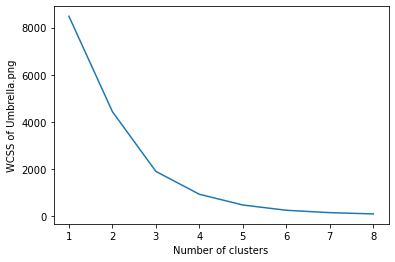

In [290]:
plt.plot(range(1,9), umb_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS of Umbrella.png') 
plt.show()

In [374]:
umb_bcss=[umb_2_bcss,umb_4_bcss,umb_8_bcss,umb_16_bcss,umb_32_bcss,umb_64_bcss,umb_128_bcss,umb_256_bcss]

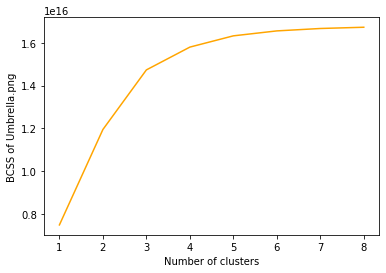

In [375]:
plt.plot(range(1,9), umb_bcss, c='orange')
plt.xlabel('Number of clusters')
plt.ylabel('BCSS of Umbrella.png') 
plt.show()

# Graffiti

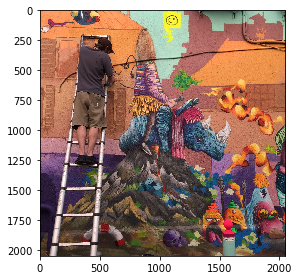

In [227]:
graf_image=image_read('graffiti.png')

In [ ]:
graf_image=graf_image.astype(int)

In [228]:
#graf_image = resize(graf_image, (256,256),anti_aliasing=True)

In [229]:
#Dimension of the original image
rows_graf = graf_image.shape[0]
cols_graf = graf_image.shape[1]

print(graf_image.shape)

(2048, 2048, 3)


In [230]:
graf_image = graf_image.reshape(rows_graf*cols_graf, 3)

In [231]:
print("image bytes = ",img_bytes('graffiti.png'))

print("image unique colors = ",unique_color(graf_image))

image bytes =  6567011
image unique colors =  508600


In [232]:
graf_bytes=img_bytes('graffiti.png')

## k=2

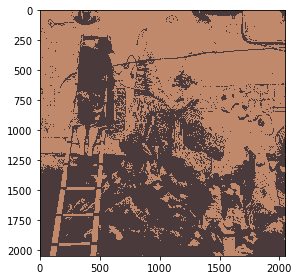

In [233]:
#Implement k-means clustering to form k clusters
kmeans_graf_2= KMeans(n_clusters=2)
kmeans_graf_2.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_2 = kmeans_graf_2.cluster_centers_[kmeans_graf_2.labels_]
compressed_image_graf_2  = np.clip(compressed_image_graf_2.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_2  = compressed_image_graf_2.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_2.png", compressed_image_graf_2 )
io.imshow(compressed_image_graf_2 )
io.show()

In [236]:
print("image bytes = ",img_bytes('compressed_image_graf_2.png'))

image bytes =  241901


In [237]:
graf_2_wcss=wcss(graf_image,kmeans_graf_2.cluster_centers_[kmeans_graf_2.labels_])

In [376]:
graf_2_bcss=bcss(graf_image,kmeans_graf_2.cluster_centers_[kmeans_graf_2.labels_])

In [ ]:
graf_2_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_2.labels_, metric='euclidean')

In [487]:
names_of_colors(kmeans_graf_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkslategray
Closest Match for the name of  1 th centroid color :  rosybrown


['darkslategray', 'rosybrown']

## k=4

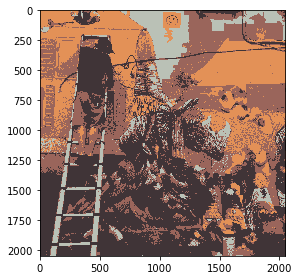

image bytes =  452018


In [238]:
#Implement k-means clustering to form k clusters
kmeans_graf_4= KMeans(n_clusters=4)
kmeans_graf_4.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_4 = kmeans_graf_4.cluster_centers_[kmeans_graf_4.labels_]
compressed_image_graf_4  = np.clip(compressed_image_graf_4.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_4  = compressed_image_graf_4.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_4.png", compressed_image_graf_4)
io.imshow(compressed_image_graf_4 )
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_4.png'))

In [239]:
graf_4_bytes=img_bytes('compressed_image_graf_4.png')

In [240]:
graf_4_wcss=wcss(graf_image,kmeans_graf_4.cluster_centers_[kmeans_graf_4.labels_])

In [377]:
graf_4_bcss=bcss(graf_image,kmeans_graf_4.cluster_centers_[kmeans_graf_4.labels_])

In [ ]:
graf_4_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_4.labels_, metric='euclidean')

In [488]:
names_of_colors(kmeans_graf_2.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkslategray
Closest Match for the name of  1 th centroid color :  rosybrown


['darkslategray', 'rosybrown']

## k=8

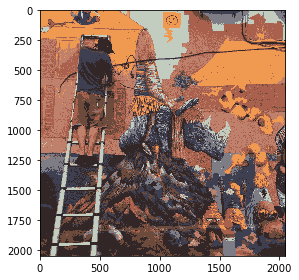

image bytes =  865972


In [241]:
#Implement k-means clustering to form k clusters
kmeans_graf_8= KMeans(n_clusters=8)
kmeans_graf_8.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_8 = kmeans_graf_8.cluster_centers_[kmeans_graf_8.labels_]
compressed_image_graf_8 = np.clip(compressed_image_graf_8.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_8  = compressed_image_graf_8.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_8.png", compressed_image_graf_8)
io.imshow(compressed_image_graf_8 )
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_8.png'))

In [242]:
graf_8_bytes=img_bytes('compressed_image_graf_8.png')

In [243]:
graf_8_wcss=wcss(graf_image,kmeans_graf_8.cluster_centers_[kmeans_graf_8.labels_])

In [378]:
graf_8_bcss=bcss(graf_image,kmeans_graf_8.cluster_centers_[kmeans_graf_8.labels_])

In [ ]:
graf_8_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_8.labels_, metric='euclidean')

In [489]:
names_of_colors(kmeans_graf_8.cluster_centers_)

Closest Match for the name of  0 th centroid color :  sienna
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  silver
Closest Match for the name of  3 th centroid color :  sandybrown
Closest Match for the name of  4 th centroid color :  darkolivegreen
Closest Match for the name of  5 th centroid color :  gray
Closest Match for the name of  6 th centroid color :  rosybrown
Closest Match for the name of  7 th centroid color :  darkslategray


['sienna',
 'darkslategray',
 'silver',
 'sandybrown',
 'darkolivegreen',
 'gray',
 'rosybrown',
 'darkslategray']

## k=16

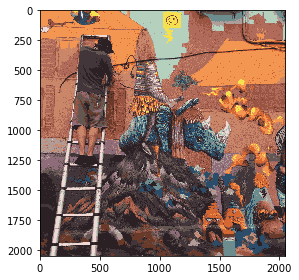

image bytes =  1222617


In [244]:
#Implement k-means clustering to form k clusters
kmeans_graf_16= KMeans(n_clusters=16)
kmeans_graf_16.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_16 = kmeans_graf_16.cluster_centers_[kmeans_graf_16.labels_]
compressed_image_graf_16  = np.clip(compressed_image_graf_16.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_16 = compressed_image_graf_16.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_16.png", compressed_image_graf_16)
io.imshow(compressed_image_graf_16)
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_16.png'))

In [245]:
graf_16_bytes=img_bytes('compressed_image_graf_256.png')

In [246]:
graf_16_wcss=wcss(graf_image,kmeans_graf_16.cluster_centers_[kmeans_graf_16.labels_])

In [379]:
graf_16_bcss=bcss(graf_image,kmeans_graf_16.cluster_centers_[kmeans_graf_16.labels_])

In [ ]:
graf_16_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_16.labels_, metric='euclidean')

In [490]:
names_of_colors(kmeans_graf_16.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darksalmon
Closest Match for the name of  1 th centroid color :  saddlebrown
Closest Match for the name of  2 th centroid color :  antiquewhite
Closest Match for the name of  3 th centroid color :  sandybrown
Closest Match for the name of  4 th centroid color :  darkslategray
Closest Match for the name of  5 th centroid color :  sienna
Closest Match for the name of  6 th centroid color :  chocolate
Closest Match for the name of  7 th centroid color :  darkslategray
Closest Match for the name of  8 th centroid color :  silver
Closest Match for the name of  9 th centroid color :  gray
Closest Match for the name of  10 th centroid color :  dimgray
Closest Match for the name of  11 th centroid color :  darkslategray
Closest Match for the name of  12 th centroid color :  indianred
Closest Match for the name of  13 th centroid color :  slategray
Closest Match for the name of  14 th centroid color :  khaki
Closest Match for the name of  15

['darksalmon',
 'saddlebrown',
 'antiquewhite',
 'sandybrown',
 'darkslategray',
 'sienna',
 'chocolate',
 'darkslategray',
 'silver',
 'gray',
 'dimgray',
 'darkslategray',
 'indianred',
 'slategray',
 'khaki',
 'rosybrown']

## k=32

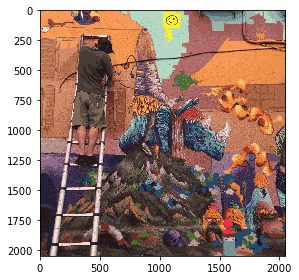

image bytes =  1795579


In [247]:
#Implement k-means clustering to form k clusters
kmeans_graf_32= KMeans(n_clusters=32)
kmeans_graf_32.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_32 = kmeans_graf_32.cluster_centers_[kmeans_graf_32.labels_]
compressed_image_graf_32  = np.clip(compressed_image_graf_32.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_32  = compressed_image_graf_32.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_32.png", compressed_image_graf_32 )
io.imshow(compressed_image_graf_32 )
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_32.png'))

In [248]:
graf_32_bytes=img_bytes('compressed_image_graf_32.png')

In [249]:
graf_32_wcss=wcss(graf_image,kmeans_graf_32.cluster_centers_[kmeans_graf_32.labels_])

In [380]:
graf_32_bcss=bcss(graf_image,kmeans_graf_32.cluster_centers_[kmeans_graf_32.labels_])

In [ ]:
graf_32_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_32.labels_, metric='euclidean')

In [491]:
names_of_colors(kmeans_graf_32.cluster_centers_)

Closest Match for the name of  0 th centroid color :  darkslategray
Closest Match for the name of  1 th centroid color :  darksalmon
Closest Match for the name of  2 th centroid color :  dimgray
Closest Match for the name of  3 th centroid color :  silver
Closest Match for the name of  4 th centroid color :  darkslategray
Closest Match for the name of  5 th centroid color :  darkgray
Closest Match for the name of  6 th centroid color :  indianred
Closest Match for the name of  7 th centroid color :  sandybrown
Closest Match for the name of  8 th centroid color :  sienna
Closest Match for the name of  9 th centroid color :  chocolate
Closest Match for the name of  10 th centroid color :  sandybrown
Closest Match for the name of  11 th centroid color :  gray
Closest Match for the name of  12 th centroid color :  mistyrose
Closest Match for the name of  13 th centroid color :  lightslategray
Closest Match for the name of  14 th centroid color :  darkolivegreen
Closest Match for the name o

['darkslategray',
 'darksalmon',
 'dimgray',
 'silver',
 'darkslategray',
 'darkgray',
 'indianred',
 'sandybrown',
 'sienna',
 'chocolate',
 'sandybrown',
 'gray',
 'mistyrose',
 'lightslategray',
 'darkolivegreen',
 'dimgray',
 'rosybrown',
 'sienna',
 'darkslategray',
 'dimgray',
 'silver',
 'peru',
 'darkslategray',
 'yellow',
 'darkslategray',
 'darkolivegreen',
 'crimson',
 'black',
 'coral',
 'brown',
 'indianred',
 'saddlebrown']

## k=64

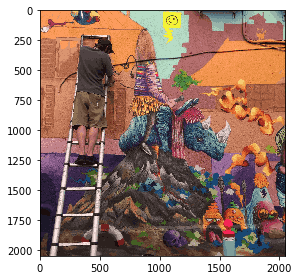

image bytes =  2544333


In [250]:
#Implement k-means clustering to form k clusters
kmeans_graf_64= KMeans(n_clusters=64)
kmeans_graf_64.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_64 = kmeans_graf_64.cluster_centers_[kmeans_graf_64.labels_]
compressed_image_graf_64  = np.clip(compressed_image_graf_64.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_64 = compressed_image_graf_64.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_64.png", compressed_image_graf_64)
io.imshow(compressed_image_graf_64)
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_64.png'))

In [251]:
graf_64_bytes=img_bytes('compressed_image_graf_64.png')

In [252]:
graf_64_wcss=wcss(graf_image,kmeans_graf_64.cluster_centers_[kmeans_graf_64.labels_])

In [381]:
graf_64_bcss=bcss(graf_image,kmeans_graf_64.cluster_centers_[kmeans_graf_64.labels_])

In [ ]:
graf_64_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_64.labels_, metric='euclidean')

In [492]:
names_of_colors(kmeans_graf_64.cluster_centers_)

Closest Match for the name of  0 th centroid color :  dimgray
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  sandybrown
Closest Match for the name of  3 th centroid color :  silver
Closest Match for the name of  4 th centroid color :  indianred
Closest Match for the name of  5 th centroid color :  dimgray
Closest Match for the name of  6 th centroid color :  darkolivegreen
Closest Match for the name of  7 th centroid color :  peru
Closest Match for the name of  8 th centroid color :  rosybrown
Closest Match for the name of  9 th centroid color :  darkslategray
Closest Match for the name of  10 th centroid color :  sienna
Closest Match for the name of  11 th centroid color :  darkolivegreen
Closest Match for the name of  12 th centroid color :  darkslategray
Closest Match for the name of  13 th centroid color :  yellow
Closest Match for the name of  14 th centroid color :  black
Closest Match for the name of  15 

['dimgray',
 'darkslategray',
 'sandybrown',
 'silver',
 'indianred',
 'dimgray',
 'darkolivegreen',
 'peru',
 'rosybrown',
 'darkslategray',
 'sienna',
 'darkolivegreen',
 'darkslategray',
 'yellow',
 'black',
 'mistyrose',
 'slategray',
 'gray',
 'darkslategray',
 'sienna',
 'darksalmon',
 'maroon',
 'peru',
 'silver',
 'indianred',
 'darkslategray',
 'darkolivegreen',
 'crimson',
 'dimgray',
 'brown',
 'darkslategray',
 'chocolate',
 'gray',
 'brown',
 'rosybrown',
 'dimgray',
 'black',
 'peru',
 'lightgray',
 'khaki',
 'indianred',
 'sandybrown',
 'saddlebrown',
 'darkslategray',
 'chocolate',
 'darkkhaki',
 'darkslategray',
 'indianred',
 'sienna',
 'silver',
 'dimgray',
 'olivedrab',
 'darkslategray',
 'lightslategray',
 'darkslategray',
 'brown',
 'tan',
 'gray',
 'dimgray',
 'darkolivegreen',
 'sandybrown',
 'darkgray',
 'black',
 'darkslategray']

## k=128

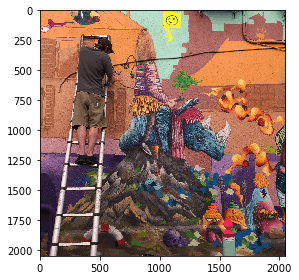

image bytes =  3450499


In [253]:
#Implement k-means clustering to form k clusters
kmeans_graf_128= KMeans(n_clusters=128)
kmeans_graf_128.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_128 = kmeans_graf_128.cluster_centers_[kmeans_graf_128.labels_]
compressed_image_graf_128 = np.clip(compressed_image_graf_128.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_128 = compressed_image_graf_128.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_128.png", compressed_image_graf_128)
io.imshow(compressed_image_graf_128)
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_128.png'))

In [254]:
graf_128_bytes=img_bytes('compressed_image_graf_128.png')

In [255]:
graf_128_wcss=wcss(graf_image,kmeans_graf_128.cluster_centers_[kmeans_graf_128.labels_])

In [382]:
graf_128_bcss=bcss(graf_image,kmeans_graf_128.cluster_centers_[kmeans_graf_128.labels_])

In [ ]:
graf_128_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_128.labels_, metric='euclidean')

In [493]:
names_of_colors(kmeans_graf_128.cluster_centers_)

Closest Match for the name of  0 th centroid color :  sienna
Closest Match for the name of  1 th centroid color :  darkkhaki
Closest Match for the name of  2 th centroid color :  darkslategray
Closest Match for the name of  3 th centroid color :  peru
Closest Match for the name of  4 th centroid color :  sandybrown
Closest Match for the name of  5 th centroid color :  dimgray
Closest Match for the name of  6 th centroid color :  silver
Closest Match for the name of  7 th centroid color :  sienna
Closest Match for the name of  8 th centroid color :  darkgray
Closest Match for the name of  9 th centroid color :  dimgray
Closest Match for the name of  10 th centroid color :  saddlebrown
Closest Match for the name of  11 th centroid color :  black
Closest Match for the name of  12 th centroid color :  rosybrown
Closest Match for the name of  13 th centroid color :  yellow
Closest Match for the name of  14 th centroid color :  gray
Closest Match for the name of  15 th centroid color :  peru

['sienna',
 'darkkhaki',
 'darkslategray',
 'peru',
 'sandybrown',
 'dimgray',
 'silver',
 'sienna',
 'darkgray',
 'dimgray',
 'saddlebrown',
 'black',
 'rosybrown',
 'yellow',
 'gray',
 'peru',
 'sienna',
 'darkslategray',
 'lightgray',
 'darkslategray',
 'dimgray',
 'darkolivegreen',
 'darkslategray',
 'chocolate',
 'coral',
 'darksalmon',
 'darkslategray',
 'rosybrown',
 'gray',
 'dimgray',
 'crimson',
 'sienna',
 'darkslategray',
 'linen',
 'darkgray',
 'darkslategray',
 'olivedrab',
 'indianred',
 'darkgray',
 'darkslategray',
 'sandybrown',
 'maroon',
 'brown',
 'slategray',
 'lightslategray',
 'darkslategray',
 'black',
 'darksalmon',
 'brown',
 'peru',
 'rosybrown',
 'rosybrown',
 'darkolivegreen',
 'sienna',
 'indianred',
 'brown',
 'gray',
 'dimgray',
 'lightslategray',
 'crimson',
 'darkslategray',
 'darkslategray',
 'olivedrab',
 'sienna',
 'sandybrown',
 'darkolivegreen',
 'mistyrose',
 'gray',
 'darkslategray',
 'gray',
 'chocolate',
 'darkslategray',
 'black',
 'rosybrow

## k=256

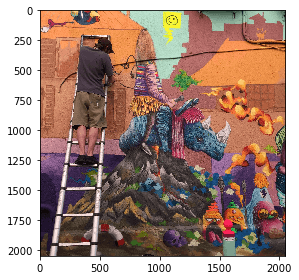

image bytes =  4307225


In [256]:
#Implement k-means clustering to form k clusters
kmeans_graf_256= KMeans(n_clusters=256)
kmeans_graf_256.fit(graf_image)

#Replace each pixel value with its nearby centroid
compressed_image_graf_256 = kmeans_graf_256.cluster_centers_[kmeans_graf_256.labels_]
compressed_image_graf_256 =np.clip(compressed_image_graf_256.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image_graf_256  = compressed_image_graf_256.reshape(rows_graf,cols_graf,3)
#Save and display output image
io.imsave("compressed_image_graf_256.png", compressed_image_graf_256 )
io.imshow(compressed_image_graf_256 )
io.show()
print("image bytes = ",img_bytes('compressed_image_graf_256.png'))

In [257]:
graf_256_bytes=img_bytes('compressed_image_graf_256.png')

In [258]:
graf_256_wcss=wcss(graf_image,kmeans_graf_256.cluster_centers_[kmeans_graf_256.labels_])

In [383]:
graf_256_bcss=bcss(graf_image,kmeans_graf_256.cluster_centers_[kmeans_graf_256.labels_])

In [ ]:
graf_256_silhouette=metrics.silhouette_score(graf_image, kmeans_graf_256.labels_, metric='euclidean')

In [494]:
names_of_colors(kmeans_graf_256.cluster_centers_)

Closest Match for the name of  0 th centroid color :  sandybrown
Closest Match for the name of  1 th centroid color :  darkslategray
Closest Match for the name of  2 th centroid color :  dimgray
Closest Match for the name of  3 th centroid color :  powderblue
Closest Match for the name of  4 th centroid color :  peru
Closest Match for the name of  5 th centroid color :  darkslategray
Closest Match for the name of  6 th centroid color :  darkkhaki
Closest Match for the name of  7 th centroid color :  dimgray
Closest Match for the name of  8 th centroid color :  sienna
Closest Match for the name of  9 th centroid color :  saddlebrown
Closest Match for the name of  10 th centroid color :  black
Closest Match for the name of  11 th centroid color :  coral
Closest Match for the name of  12 th centroid color :  sienna
Closest Match for the name of  13 th centroid color :  darkslategray
Closest Match for the name of  14 th centroid color :  gray
Closest Match for the name of  15 th centroid c

Closest Match for the name of  160 th centroid color :  seagreen
Closest Match for the name of  161 th centroid color :  sienna
Closest Match for the name of  162 th centroid color :  chocolate
Closest Match for the name of  163 th centroid color :  saddlebrown
Closest Match for the name of  164 th centroid color :  darkslategray
Closest Match for the name of  165 th centroid color :  sandybrown
Closest Match for the name of  166 th centroid color :  darkolivegreen
Closest Match for the name of  167 th centroid color :  mediumseagreen
Closest Match for the name of  168 th centroid color :  saddlebrown
Closest Match for the name of  169 th centroid color :  darkkhaki
Closest Match for the name of  170 th centroid color :  burlywood
Closest Match for the name of  171 th centroid color :  brown
Closest Match for the name of  172 th centroid color :  olivedrab
Closest Match for the name of  173 th centroid color :  crimson
Closest Match for the name of  174 th centroid color :  slategray
C

['sandybrown',
 'darkslategray',
 'dimgray',
 'powderblue',
 'peru',
 'darkslategray',
 'darkkhaki',
 'dimgray',
 'sienna',
 'saddlebrown',
 'black',
 'coral',
 'sienna',
 'darkslategray',
 'gray',
 'rosybrown',
 'yellow',
 'gainsboro',
 'silver',
 'darkslategray',
 'indianred',
 'darkolivegreen',
 'darkslategray',
 'darksalmon',
 'dimgray',
 'chocolate',
 'dimgray',
 'darkslategray',
 'darkgray',
 'indianred',
 'rosybrown',
 'darkslategray',
 'lightslategray',
 'dimgray',
 'darkslateblue',
 'silver',
 'darkslategray',
 'darkslategray',
 'rosybrown',
 'tan',
 'brown',
 'dimgray',
 'black',
 'darkolivegreen',
 'indianred',
 'darkslategray',
 'indianred',
 'sandybrown',
 'sienna',
 'darkgray',
 'sandybrown',
 'maroon',
 'peru',
 'crimson',
 'darkslategray',
 'khaki',
 'olivedrab',
 'dimgray',
 'lightgray',
 'darkslategray',
 'chocolate',
 'darksalmon',
 'sienna',
 'silver',
 'darksalmon',
 'darkolivegreen',
 'tan',
 'brown',
 'brown',
 'seagreen',
 'darkolivegreen',
 'khaki',
 'darkslate

In [291]:
graf_wcss=[graf_2_wcss,graf_4_wcss,graf_8_wcss,graf_16_wcss,graf_32_wcss,graf_64_wcss,graf_128_wcss,graf_256_wcss]

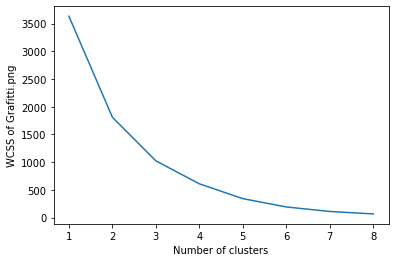

In [292]:
plt.plot(range(1,9), graf_wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS of Grafitti.png') 
plt.show()

In [384]:
graf_bcss=[graf_2_bcss,graf_4_bcss,graf_8_bcss,graf_16_bcss,graf_32_bcss,graf_64_bcss,graf_128_bcss,graf_256_bcss]

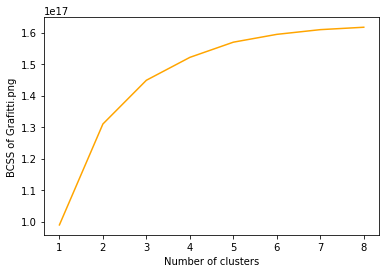

In [385]:
plt.plot(range(1,9), graf_bcss,c='orange')
plt.xlabel('Number of clusters')
plt.ylabel('BCSS of Grafitti.png') 
plt.show()